# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from matplotlib.colors import to_hex

In [2]:
import matplotlib
print(matplotlib.__version__)
print(sns.__version__)

3.6.3
0.13.2


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
import importlib.util

In [5]:
ccv_spec = importlib.util.spec_from_file_location("codon_context_variables", "codon_context_variables.py")
ccv = importlib.util.module_from_spec(ccv_spec)
ccv_spec.loader.exec_module(ccv)

In [6]:
#loads Arial font
ccp_spec = importlib.util.spec_from_file_location("codon_context_plotting_variables", "codon_context_plotting_variables.py")
ccp = importlib.util.module_from_spec(ccp_spec)
ccp_spec.loader.exec_module(ccp)

/igm/home/bsm006/.cache/matplotlib
/igm/home/bsm006/.local/share/fonts/Arial.ttf


Default Seaborn style:

In [7]:
sns.set_theme(font='Arial', style="white", font_scale=1.25)

## Files - read

Mutual information

In [8]:
#MI codon-nucleotide
mi_codon_nuc_pos_filename = "../data/1_mutual_information/mut_info_codon_nuc_pos_101bp_AAsub.tsv"
#Amino acid attributes
aa_attrib_syn_filename = "../data/1_mutual_information/aa_atributes_mut_info_AAsub.tsv"
#MI codon-codon
mi_codon_cxtCodon_pos_filename = "../data/1_mutual_information/mut_info_codon_cxtCodon_33cod_AAsub.tsv"
#MI codon-nucleotide summed x3
mi_codon_3nuc_pos_filename = "../data/1_mutual_information/mut_info_codon_sum3nuc_33cod_AAsub.tsv"
#MI codon-nuc, shuffled
mi_shuffled_long_filename = "../data/1_mutual_information/mut_info_codon_nuc_pos_context_permutation_100n_long.tsv"
#MI trinuc-nuc, intronic 
mi_tri_nuc_pos_intronic_filename = "../data/1_mutual_information/mut_info_codon_nuc_pos_101bp_AAsub_intronic_50bnd_20w.tsv"

Conditional mutual information

In [48]:

#CMI codon-nucleotide-modVariable
# xCategory
cmi_sequence_comp_filename = "../data/2_conditional_mutual_information/cond_mut_inf_codon_nuc_pos_var_SeqComp.tsv"
cmi_rna_stab_filename = "../data/2_conditional_mutual_information/cond_mut_inf_codon_nuc_pos_var_RNAStab.tsv"
cmi_codon_att_filename = "../data/2_conditional_mutual_information/cond_mut_inf_codon_nuc_pos_var_CodonAttrib.tsv"
#MI codon-variable
mi_var_combined_filename = "../data/2_conditional_mutual_information/mut_inf_codon_var_combined.tsv"
#CMI GC range
cmi_gc_filename = "../data/2_conditional_mutual_information/cond_mut_inf_codon_nuc_pos_var_GCcount_20bins.tsv"
cmi_gc_range_filename = "../data/2_conditional_mutual_information/cmi_codon_nuc_pos_GCcount_20bins_range.tsv"

Codon context score

In [8]:
#Codon nucleotide bias factors
codon_nuc_bias_filename = "../data/3_codon_context_score/codon_nuc_mi_bias_factors_AminoAcid_sub_12nt.tsv"
#Scored variants
#--average weight by position
variant_weight_xPositionGroup_xSNVContext_filename = "../data/3_codon_context_score/syn_variant_12nt_codon_context_scoreAvg_xPosition_xSNVContext.tsv"
#Constraint variant values (unfiltered)
constraint_variant_filename = "../data/3_codon_context_score/constraint_curve_diff_sum_context_score_REF_Codon_zscore_100bins_12nt_CP3_xSNVContext_y_yrand.tsv"
#Constraint curve fits
constraint_curve_filename = "../data/3_codon_context_score/constraint_curve_fits_1000min_dsCS_RCodonZ_100b_12nt_CP3_xSNVContext_y.tsv"
constraint_curve_rand_filename = "../data/3_codon_context_score/constraint_curve_fits_1000min_dsCS_RCodonZ_100b_12nt_CP3_xSNVContext_yrand.tsv"

Analysis of TCGA cohorts

In [30]:
#TCGA context enrichments
thresholds_5_brca_ucec_chisquare = "../data/4_tcga_analysis/scores_enriched_on_5quantile_cohortBRCA_UCEC_TCGA_AC0bg_ConNegCP3.tsv"
gsea_summary_chi2_filename = "../data/4_tcga_analysis/gseapy_ora_summary_kegg_go_cohortBRCA_UCEC_n100_AC0_5q_CT_CG_GA.tsv"

## Functions

In [10]:
def linear_y (x_val, b, m) :
    y_val = m*float(x_val) + b
    
    return y_val

# Figure 1

Schematic of codon context stacking and calculating scheme

# Figure 2

* Show pattern of maxima at CP3 positions
* Show which amino acids have large +1 values and how that relates to having large MI values at CP3 positions
* Variables to consider: multiplicity, polarity, GC-content

In [11]:
mi_codon_nuc_pos_df = pd.read_csv(mi_codon_nuc_pos_filename,
                    sep="\t",
                    index_col=0)
mi_codon_nuc_pos_df.head()

,mi_p0,mi_p1,mi_p2,mi_p3,mi_p4,mi_p5,mi_p6,mi_p7,mi_p8,mi_p9,mi_p10,mi_p11,mi_p12,mi_p13,mi_p14,mi_p15,mi_p16,mi_p17,mi_p18,mi_p19,mi_p20,mi_p21,mi_p22,mi_p23,mi_p24,mi_p25,mi_p26,mi_p27,mi_p28,mi_p29,mi_p30,mi_p31,mi_p32,mi_p33,mi_p34,mi_p35,mi_p36,mi_p37,mi_p38,mi_p39,mi_p40,mi_p41,mi_p42,mi_p43,mi_p44,mi_p45,mi_p46,mi_p47,mi_p48,mi_p49,mi_p50,mi_p51,mi_p52,mi_p53,mi_p54,mi_p55,mi_p56,mi_p57,mi_p58,mi_p59,mi_p60,mi_p61,mi_p62,mi_p63,mi_p64,mi_p65,mi_p66,mi_p67,mi_p68,mi_p69,mi_p70,mi_p71,mi_p72,mi_p73,mi_p74,mi_p75,mi_p76,mi_p77,mi_p78,mi_p79,mi_p80,mi_p81,mi_p82,mi_p83,mi_p84,mi_p85,mi_p86,mi_p87,mi_p88,mi_p89,mi_p90,mi_p91,mi_p92,mi_p93,mi_p94,mi_p95,mi_p96,mi_p97,mi_p98,mi_p99,mi_p100
F,0.000898,0.000489,0.009987,0.001003,0.000359,0.010640,0.000931,0.000365,0.010564,0.000725,0.000419,0.011088,0.000963,0.000489,0.010566,0.001002,0.000422,0.011028,0.000925,0.000443,0.010698,0.000909,0.000391,0.010388,0.001120,0.000528,0.011200,0.000808,0.000342,0.011028,0.000986,0.000635,0.011698,0.000833,0.000504,0.011783,0.000962,0.000566,0.011691,0.001004,0.000433,0.011142,0.001151,0.000401,0.012995,0.000440,0.000426,0.019747,0.0,0.0,0.0,0.079302,0.002875,0.016938,0.000619,0.000724,0.013166,0.001017,0.000413,0.012028,0.000908,0.000336,0.012353,0.000905,0.000386,0.012572,0.000792,0.000384,0.012184,0.000828,0.000448,0.011508,0.000900,0.000451,0.011779,0.000920,0.000447,0.011388,0.000901,0.000543,0.010595,0.001046,0.000441,0.011051,0.000803,0.000529,0.010391,0.000900,0.000319,0.010848,0.000779,0.000408,0.010414,0.000811,0.000316,0.010542,0.000970,0.000494,0.010054,0.000934,0.000355
L2,0.000539,0.000212,0.003999,0.000590,0.000290,0.004325,0.000498,0.000304,0.004262,0.000558,0.000198,0.004015,0.000545,0.000351,0.004373,0.000570,0.000403,0.003712,0.000563,0.000242,0.004110,0.000404,0.000160,0.004367,0.000677,0.000399,0.003955,0.000418,0.000122,0.004506,0.000456,0.000251,0.004640,0.000499,0.000322,0.004485,0.000475,0.000193,0.005160,0.000430,0.000075,0.004513,0.000476,0.000527,0.004432,0.000679,0.000783,0.008151,0.0,0.0,0.0,0.004859,0.000318,0.004713,0.000706,0.000836,0.003862,0.000305,0.000407,0.004198,0.000664,0.000310,0.004445,0.000607,0.000331,0.004084,0.000413,0.000323,0.004092,0.000527,0.000250,0.004218,0.000594,0.000213,0.003869,0.000442,0.000360,0.004073,0.000466,0.000279,0.004263,0.000702,0.000329,0.003739,0.000386,0.000290,0.004056,0.000335,0.000360,0.004010,0.000578,0.000249,0.003645,0.000523,0.000280,0.003733,0.000508,0.000203,0.004014,0.000479,0.000190
L4,0.000987,0.000427,0.011659,0.001517,0.000601,0.012052,0.001353,0.000704,0.012540,0.001620,0.000365,0.012610,0.001504,0.000714,0.012711,0.001351,0.000674,0.012898,0.001616,0.000372,0.013479,0.001363,0.000406,0.012698,0.001466,0.000723,0.013810,0.001293,0.000390,0.012474,0.001729,0.000746,0.014175,0.001525,0.000644,0.014679,0.001221,0.000595,0.014705,0.001718,0.000473,0.014637,0.001856,0.001003,0.016700,0.001071,0.000878,0.017092,0.0,0.0,0.0,0.051991,0.005053,0.018732,0.001750,0.001014,0.014966,0.001566,0.000915,0.014623,0.001497,0.000861,0.013631,0.002018,0.000750,0.014492,0.001992,0.000676,0.013794,0.001316,0.000826,0.013616,0.001515,0.000528,0.013235,0.001502,0.000461,0.013534,0.001454,0.000737,0.012742,0.001594,0.000689,0.013112,0.001002,0.000564,0.012315,0.001499,0.000749,0.012379,0.001438,0.000573,0.012421,0.001457,0.000351,0.012800,0.001292,0.000660,0.012302,0.001159,0.000642
I,0.001146,0.000506,0.014883,0.001026,0.000408,0.014158,0.001087,0.000484,0.015167,0.001115,0.000634,0.014609,0.001166,0.000515,0.015609,0.001141,0.000452,0.015048,0.000951,0.000588,0.015302,0.001004,0.000554,0.016013,0.001053,0.000490,0.015899,0.001154,0.000450,0.014995,0.000979,0.000617,0.016382,0.001064,0.000478,0.016954,0.001130,0.000651,0.016597,0.000770,0.000604,0.016623,0.000616,0.000575,0.016253,0.000570,0.000877,0.030607,0.0,0.0,0.0,0.043454,0.002786,0.023063,0.000601,0.000856,0.018227,0.001057,0.000679,0.017351,0.000974,0.000592,0.016523,0.000922,0.000800,0.016712,0.000750,0.000537,0.016033,0.0

In [12]:
#Grab 24nt window around central codon
mi_12w_masked_df = mi_codon_nuc_pos_df.iloc[:,(51-12-3):(51+12)].copy()
# isolate +1 values
mi_p1_df = mi_codon_nuc_pos_df[["mi_p51"]]
# mask +1 values from full array
mi_12w_masked_df.loc[:,"mi_p51"] = 0.0


In [13]:
#Compare -1 and +1 values
m1_values = mi_12w_masked_df["mi_p47"]
p1_values = mi_p1_df["mi_p51"]
p1_values/m1_values

F     4.015958
L2    0.596112
L4    3.041876
I     1.419735
V     2.596512
S4    4.467988
S2    5.905344
P     3.383673
T     3.917761
A     2.907286
Y     4.725796
H     2.772201
Q     0.746754
N     4.003418
K     0.254561
D     6.357365
E     0.233504
C     5.670110
R4    2.598395
R2    0.557544
G     2.317585
dtype: float64

In [14]:
# mean of ratio across amino acids
(p1_values/m1_values).mean()

2.975689412316682

In [15]:
p1_values.sort_values()

K     0.002419
L2    0.004859
R2    0.004964
E     0.005302
Q     0.008066
H     0.040678
I     0.043454
R4    0.046074
G     0.046940
V     0.049554
L4    0.051991
P     0.052700
Y     0.063691
N     0.064532
T     0.065148
S2    0.068942
A     0.069737
S4    0.072003
D     0.075458
F     0.079302
C     0.087061
Name: mi_p51, dtype: float64

In [16]:
#Get MI values at CP3 positions
cp3 = mi_12w_masked_df.iloc[:,2::3].drop(columns="mi_p50")
cp3.head()

,mi_p38,mi_p41,mi_p44,mi_p47,mi_p53,mi_p56,mi_p59,mi_p62
F,0.011691,0.011142,0.012995,0.019747,0.016938,0.013166,0.012028,0.012353
L2,0.005160,0.004513,0.004432,0.008151,0.004713,0.003862,0.004198,0.004445
L4,0.014705,0.014637,0.016700,0.017092,0.018732,0.014966,0.014623,0.013631
I,0.016597,0.016623,0.016253,0.030607,0.023063,0.018227,0.017351,0.016523
V,0.014479,0.014850,0.017043,0.019085,0.018739,0.015423,0.014742,0.014815


In [17]:
# repeat for other codon positions, omitting central codon positions and +1 position
cp1 = mi_12w_masked_df.iloc[:,0::3].drop(columns=["mi_p48","mi_p51"])
cp2 = mi_12w_masked_df.iloc[:,1::3].drop(columns=["mi_p49"])

In [18]:
# calculate across CP positions and across amino acids
cp3_mean = cp3.mean().mean()
cp2_mean = cp2.mean().mean()
cp1_mean = cp1.mean().mean()

print(cp3_mean, cp2_mean, cp1_mean)
print(cp3_mean/cp2_mean, cp3_mean/cp1_mean)

0.013307882150127254 0.0010152952599269509 0.001361487510263092
13.107401044189587 9.774516512131395


In [19]:
# ratio of CP3 and CP2 values for each amino acid
cp3_cp2_aa_mean = cp3.mean(axis=1).values/cp2.mean(axis=1).values
print(cp3_cp2_aa_mean)
print(np.mean(cp3_cp2_aa_mean))

[17.82011987 11.44330449 11.59004506 20.37375968 13.31429245 10.98146112
 12.63202553  8.98731895 15.29758825 10.54365611 17.59847669 16.42623895
 14.49579727 19.48422175 23.40456134 11.38012334 19.83647381  7.79258712
 11.70511655 20.72881723  8.3620086 ]
14.485618768507848


In [20]:
# ratio of CP3 and CP1 values for each amino acid
cp3_cp1_aa_mean = cp3.mean(axis=1).values/cp1.mean(axis=1).values
print(cp3_cp1_aa_mean)
print(np.mean(cp3_cp1_aa_mean))

[15.78666335  9.25000139 10.24855362 23.7613317  14.80872206 11.58498923
 10.80289685  6.2898499  13.8162713   7.48516886 13.23999294  9.41555059
  6.31268616 18.83143872  9.92984615 11.12795729  6.97801843  7.24090716
  7.74992934  7.23921777  8.02315124]
10.94872114432857


Select AA order

`mi_p53` sorts it by N+3

In [21]:
ordering_column = "mi_p53"
aa_order = mi_codon_nuc_pos_df[ordering_column].sort_values(ascending=False).index
aa_order

Index(['I', 'A', 'V', 'L4', 'T', 'R4', 'G', 'E', 'F', 'S4', 'P', 'N', 'Y',
       'S2', 'H', 'D', 'Q', 'C', 'K', 'R2', 'L2'],
      dtype='object')

## Selected plot

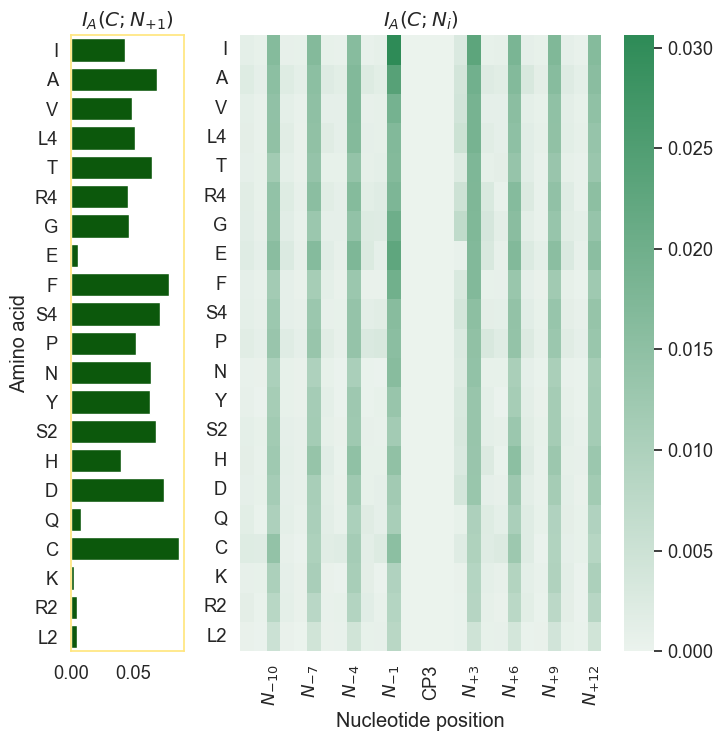

In [23]:
sns.set_theme(font='Arial', style="white", font_scale=1.20)

#set up data
data2_a = mi_p1_df.loc[aa_order,:].reset_index()
data2_b = mi_12w_masked_df.loc[aa_order]
data2_b.columns = ccp.get_flat_sequence_labels_formatted(27,14)

fig1_cmap = "seagreen"
fig1_grad_cmap = sns.light_palette(fig1_cmap, as_cmap=True)

f, (ax1, ax2) = plt.subplots(1, 2, sharey='col', 
                             width_ratios=[1,4],
                             figsize=(8, 8))
f2 = sns.barplot(ax=ax1,
                 x="mi_p51",
                 y="index",
                 data=data2_a,
                 orient="h",
                 color="darkgreen")

f1 = sns.heatmap(ax = ax2,
                 data = data2_b,
                 cmap=fig1_grad_cmap)

ax1.set_title('$I_{A}(C;N_{+1})$')
ax1.set_xlabel("")
ax1.set_ylabel("Amino acid")
for spine in ax1.spines.values():
    spine.set_edgecolor('#ffe680')

ax2.set_title('$I_{A}(C;N_{i})$')
ax2.set_xlabel("Nucleotide position")
ax2.tick_params(axis="y", rotation=0)
tick_settings = list(range(2, 27, 3))
tick_places = [x+.25 for x in tick_settings]
tick_array = ax2.xaxis.set_ticks(tick_places,data2_b.columns[tick_settings])

if (True) :
    plt.savefig("../plots/Figure2_graph.pdf", dpi=300, 
                bbox_inches = "tight")

# Supp Figure 1

* Summarize mutual information out to larger distances
* Do swarm plots for mutual information of different groupings of amino acids

In [30]:
mi_codon_nuc_pos_df = pd.read_csv(mi_codon_nuc_pos_filename,
                                  sep="\t",
                                  index_col=0)

In [31]:
#Files - use same as with Fig 2
mi_codon_nuc_pos_df.head()

,mi_p0,mi_p1,mi_p2,mi_p3,mi_p4,mi_p5,mi_p6,mi_p7,mi_p8,mi_p9,mi_p10,mi_p11,mi_p12,mi_p13,mi_p14,mi_p15,mi_p16,mi_p17,mi_p18,mi_p19,mi_p20,mi_p21,mi_p22,mi_p23,mi_p24,mi_p25,mi_p26,mi_p27,mi_p28,mi_p29,mi_p30,mi_p31,mi_p32,mi_p33,mi_p34,mi_p35,mi_p36,mi_p37,mi_p38,mi_p39,mi_p40,mi_p41,mi_p42,mi_p43,mi_p44,mi_p45,mi_p46,mi_p47,mi_p48,mi_p49,mi_p50,mi_p51,mi_p52,mi_p53,mi_p54,mi_p55,mi_p56,mi_p57,mi_p58,mi_p59,mi_p60,mi_p61,mi_p62,mi_p63,mi_p64,mi_p65,mi_p66,mi_p67,mi_p68,mi_p69,mi_p70,mi_p71,mi_p72,mi_p73,mi_p74,mi_p75,mi_p76,mi_p77,mi_p78,mi_p79,mi_p80,mi_p81,mi_p82,mi_p83,mi_p84,mi_p85,mi_p86,mi_p87,mi_p88,mi_p89,mi_p90,mi_p91,mi_p92,mi_p93,mi_p94,mi_p95,mi_p96,mi_p97,mi_p98,mi_p99,mi_p100
F,0.000898,0.000489,0.009987,0.001003,0.000359,0.010640,0.000931,0.000365,0.010564,0.000725,0.000419,0.011088,0.000963,0.000489,0.010566,0.001002,0.000422,0.011028,0.000925,0.000443,0.010698,0.000909,0.000391,0.010388,0.001120,0.000528,0.011200,0.000808,0.000342,0.011028,0.000986,0.000635,0.011698,0.000833,0.000504,0.011783,0.000962,0.000566,0.011691,0.001004,0.000433,0.011142,0.001151,0.000401,0.012995,0.000440,0.000426,0.019747,0.0,0.0,0.0,0.079302,0.002875,0.016938,0.000619,0.000724,0.013166,0.001017,0.000413,0.012028,0.000908,0.000336,0.012353,0.000905,0.000386,0.012572,0.000792,0.000384,0.012184,0.000828,0.000448,0.011508,0.000900,0.000451,0.011779,0.000920,0.000447,0.011388,0.000901,0.000543,0.010595,0.001046,0.000441,0.011051,0.000803,0.000529,0.010391,0.000900,0.000319,0.010848,0.000779,0.000408,0.010414,0.000811,0.000316,0.010542,0.000970,0.000494,0.010054,0.000934,0.000355
L2,0.000539,0.000212,0.003999,0.000590,0.000290,0.004325,0.000498,0.000304,0.004262,0.000558,0.000198,0.004015,0.000545,0.000351,0.004373,0.000570,0.000403,0.003712,0.000563,0.000242,0.004110,0.000404,0.000160,0.004367,0.000677,0.000399,0.003955,0.000418,0.000122,0.004506,0.000456,0.000251,0.004640,0.000499,0.000322,0.004485,0.000475,0.000193,0.005160,0.000430,0.000075,0.004513,0.000476,0.000527,0.004432,0.000679,0.000783,0.008151,0.0,0.0,0.0,0.004859,0.000318,0.004713,0.000706,0.000836,0.003862,0.000305,0.000407,0.004198,0.000664,0.000310,0.004445,0.000607,0.000331,0.004084,0.000413,0.000323,0.004092,0.000527,0.000250,0.004218,0.000594,0.000213,0.003869,0.000442,0.000360,0.004073,0.000466,0.000279,0.004263,0.000702,0.000329,0.003739,0.000386,0.000290,0.004056,0.000335,0.000360,0.004010,0.000578,0.000249,0.003645,0.000523,0.000280,0.003733,0.000508,0.000203,0.004014,0.000479,0.000190
L4,0.000987,0.000427,0.011659,0.001517,0.000601,0.012052,0.001353,0.000704,0.012540,0.001620,0.000365,0.012610,0.001504,0.000714,0.012711,0.001351,0.000674,0.012898,0.001616,0.000372,0.013479,0.001363,0.000406,0.012698,0.001466,0.000723,0.013810,0.001293,0.000390,0.012474,0.001729,0.000746,0.014175,0.001525,0.000644,0.014679,0.001221,0.000595,0.014705,0.001718,0.000473,0.014637,0.001856,0.001003,0.016700,0.001071,0.000878,0.017092,0.0,0.0,0.0,0.051991,0.005053,0.018732,0.001750,0.001014,0.014966,0.001566,0.000915,0.014623,0.001497,0.000861,0.013631,0.002018,0.000750,0.014492,0.001992,0.000676,0.013794,0.001316,0.000826,0.013616,0.001515,0.000528,0.013235,0.001502,0.000461,0.013534,0.001454,0.000737,0.012742,0.001594,0.000689,0.013112,0.001002,0.000564,0.012315,0.001499,0.000749,0.012379,0.001438,0.000573,0.012421,0.001457,0.000351,0.012800,0.001292,0.000660,0.012302,0.001159,0.000642
I,0.001146,0.000506,0.014883,0.001026,0.000408,0.014158,0.001087,0.000484,0.015167,0.001115,0.000634,0.014609,0.001166,0.000515,0.015609,0.001141,0.000452,0.015048,0.000951,0.000588,0.015302,0.001004,0.000554,0.016013,0.001053,0.000490,0.015899,0.001154,0.000450,0.014995,0.000979,0.000617,0.016382,0.001064,0.000478,0.016954,0.001130,0.000651,0.016597,0.000770,0.000604,0.016623,0.000616,0.000575,0.016253,0.000570,0.000877,0.030607,0.0,0.0,0.0,0.043454,0.002786,0.023063,0.000601,0.000856,0.018227,0.001057,0.000679,0.017351,0.000974,0.000592,0.016523,0.000922,0.000800,0.016712,0.000750,0.000537,0.016033,0.0

In [32]:
#Read in file of amino acid attributes
aa_attrib_syn_df = pd.read_csv(aa_attrib_syn_filename,
                               sep="\t")
aa_attrib_syn_df.head()

,AminoAcid_sub,Degeneracy,GC_bases,Freq_per_k,h,AminoAcid,Polarity,MI_p1,MI_avg,MI_nop1_avg,MI_eq_p1,MI_eq_avg,MI_eq_nop1_avg
0,F,2.0,0.500000,37.9,0.691474,F,Nonpolar,0.079302,0.005042,0.004284,0.079904,0.005022,0.004258
1,L2,2.0,0.500000,20.6,0.664786,L,Nonpolar,0.004859,0.001716,0.001684,0.004859,0.001716,0.001684
2,L4,4.0,1.500000,79.6,1.211468,L,Nonpolar,0.051991,0.005683,0.005210,0.051940,0.005619,0.005146
3,I,3.0,0.333333,44.3,1.031249,I,Nonpolar,0.043454,0.006253,0.005874,0.042626,0.006236,0.005864
4,V,4.0,1.500000,60.7,1.266124,V,Nonpolar,0.049554,0.005621,0.005172,0.049745,0.005616,0.005166


Plot confidence interval using standard deviation.

Convert from wide to long:

In [33]:
mi_long_df = pd.wide_to_long(mi_codon_nuc_pos_df.reset_index(), stubnames='mi_p', 
                             i=['index'], 
                             j='position_index').\
                                 reset_index().\
                                 rename(columns={"index":"amino_acid"})
mi_long_df.head()

,amino_acid,position_index,mi_p
0,F,0,0.000898
1,L2,0,0.000539
2,L4,0,0.000987
3,I,0,0.001146
4,V,0,0.001151


Do some formatting on the AA attribute table:

In [34]:
aa_attrib_syn_df["GC_bases"] = aa_attrib_syn_df["GC_bases"].apply(lambda x:round(x,2))
aa_attrib_syn_df["Degeneracy"] = aa_attrib_syn_df["Degeneracy"].astype(int)
aa_attrib_syn_df["Compare_set"] = "AA equal"

## Selected plot

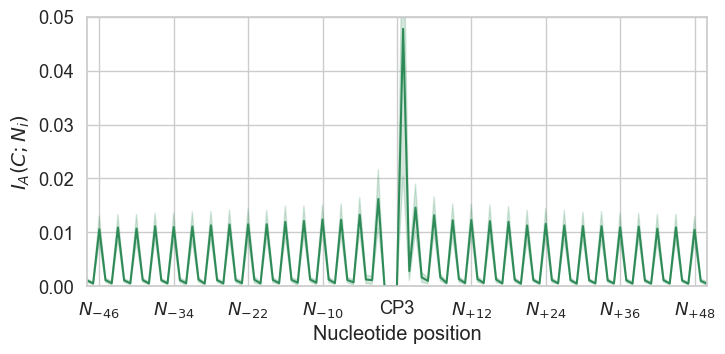

In [37]:
data1s_a = mi_long_df

sns.set_theme(font='Arial', style="whitegrid", font_scale=1.2)

#use the same color way as in Figure 2
fig1_cmap = "seagreen"
#generate position labels
pos101_labels = ccp.get_flat_sequence_labels_formatted(101,50)

f, ax = plt.subplots(figsize=(8, 3.5))

f = sns.lineplot(ax=ax,
                 x="position_index",
                 y="mi_p",
                 data=data1s_a,
                 errorbar="sd",
                 color=fig1_cmap)
ax.set_ylabel("$I_A(C;N_i)$")
ax.set_xlabel("Nucleotide position")
ax.set_ylim(0,0.05)
ax.set_xlim(0,100)
tick_settings = list(range(2, 101, 12))
tick_labels = [pos101_labels[x] for x in tick_settings]
tick_array = ax.xaxis.set_ticks(tick_settings, tick_labels)

if (True) :
    plt.savefig("../plots/Figure1SuppA_graph.pdf", dpi=300, 
                bbox_inches = "tight")

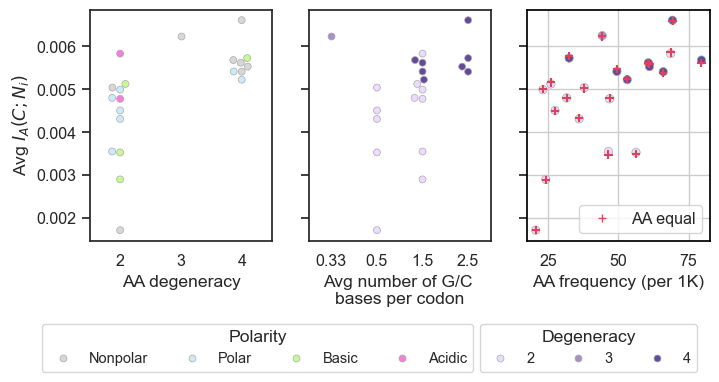

In [39]:
data1s_b = aa_attrib_syn_df
sns.set_theme(font='Arial', style="white", font_scale=1.05)

edgecolor="darkgray"

f = plt.figure(figsize=(8, 3))
gs = f.add_gridspec(1, 3)

with sns.axes_style("white", rc={'ytick.left': True}):
    ax1 = f.add_subplot(gs[0,0])
    
    ax1 = sns.swarmplot(ax=ax1,
                   x="Degeneracy",
                   y="MI_avg",
                   hue="Polarity",
                   data=data1s_b,
                   edgecolor=edgecolor,
                   linewidth=0.5,
                   palette=ccp.aa_polarity_colors)
    # Get the legend handles
    ha1, lab1 = ax1.get_legend_handles_labels()
    # Iterate through the handles and call `set_edgecolor` on each
    for ha in ha1:
        ha.set_markeredgecolor(edgecolor)
    # Set legend location
    lgd1 = ax1.legend(ha1, 
                     lab1,
                     loc="lower left",
                     bbox_to_anchor=(-.3, -.60),
                     #bbox_to_anchor=(-.1, -.45), when width=10
                     fontsize="small", ncol=4,
                     title="Polarity")
    ax1.set_ylabel("Avg $I_A(C;N_i)$")
    ax1.set_xlabel("AA degeneracy")

    ax2 = f.add_subplot(gs[0,1])

    ax2 = sns.swarmplot(ax=ax2,
                    x="GC_bases",
                    y="MI_avg",
                    hue="Degeneracy",
                    data=data1s_b,
                    edgecolor=edgecolor,
                    linewidth=0.5,
                    palette=ccp.aa_degeneracy_colors)
    ax2.set_ylabel("")
    ax2.set_xlabel("Avg number of G/C \nbases per codon")
    ax2.set_yticklabels([])
    
    # Get the legend handles
    ha2, lab2 = ax2.get_legend_handles_labels()
    # Iterate through the handles and call `set_edgecolor` on each
    for ha in ha2:
        ha.set_markeredgecolor(edgecolor)
    # Set legend location
    lgd2 = ax2.legend(ha2, 
                     lab2,
                     loc="lower left",
                     #bbox_to_anchor=(0.7, -.45), when width=10
                     bbox_to_anchor=(0.9, -.60),
                     fontsize="small", ncol=4,
                     title="Degeneracy")

with sns.axes_style("whitegrid", rc={'ytick.left': True,
                                     'axes.edgecolor': 'black'}):
    ax3 = f.add_subplot(gs[0,2])

    ax3 = sns.scatterplot(ax=ax3,
                        x="Freq_per_k",
                        y="MI_avg",
                        hue="Degeneracy",
                        data=data1s_b,
                        edgecolor=edgecolor,
                        linewidth=0.5,
                        palette=ccp.aa_degeneracy_colors,
                        legend=False)
    
    ax3 = sns.scatterplot(ax=ax3,
                        x="Freq_per_k",
                        y="MI_eq_avg",
                        data=data1s_b,
                        hue="Compare_set",
                        palette={"AA equal":"#de425b"},
                        marker="+",
                        #edgecolor=edgecolor,
                        linewidth=1.5,
                        legend=True)
        
    ax3.set_xlabel("AA frequency (per 1K)")
    ax3.set_ylabel("")
    ax3.set_yticklabels([])
    #ax3.legend()
    
    #Grab the right collection of handles and labels 
    h, l = ax3.get_legend_handles_labels() #unconstrained
    h_plus = plt.Line2D([0,0],[0,0], color="#de425b", marker='+', linestyle='') #h1[1]
    ax3.legend([h_plus], l, loc="best")
    
if (True) :
    plt.savefig("../plots/Figure1SuppB_graph.pdf", dpi=300, 
                bbox_inches = "tight")

# Supp Figure 2

Show contextual-codon x codon distribution overlap. 
* Structure it like Figure 2?
* Structure it like Supp Figure 1A and overlap grouped codon amount?

In [40]:
mi_codon_cxtCodon_pos_df = pd.read_csv(mi_codon_cxtCodon_pos_filename,
                                       sep="\t",
                                       index_col=0)
mi_codon_cxtCodon_pos_df.head()

,mi_p0,mi_p1,mi_p2,mi_p3,mi_p4,mi_p5,mi_p6,mi_p7,mi_p8,mi_p9,mi_p10,mi_p11,mi_p12,mi_p13,mi_p14,mi_p15,mi_p16,mi_p17,mi_p18,mi_p19,mi_p20,mi_p21,mi_p22,mi_p23,mi_p24,mi_p25,mi_p26,mi_p27,mi_p28,mi_p29,mi_p30,mi_p31,mi_p32
F,0.012635,0.013239,0.013034,0.013400,0.013162,0.013461,0.013205,0.013001,0.013864,0.013426,0.014510,0.014387,0.014466,0.013615,0.015658,0.021577,0.0,0.102561,0.015819,0.014798,0.014966,0.015061,0.014540,0.013868,0.014451,0.013781,0.013291,0.013704,0.012951,0.013113,0.012700,0.012737,0.012444
L2,0.005253,0.005883,0.005790,0.005353,0.005920,0.005321,0.005702,0.005568,0.005681,0.005738,0.006107,0.006100,0.006538,0.005745,0.006206,0.010281,0.0,0.011692,0.005935,0.005611,0.005998,0.005756,0.005451,0.005708,0.005392,0.005561,0.005640,0.005558,0.005343,0.005304,0.005191,0.005202,0.005367
L4,0.014579,0.015569,0.016113,0.016060,0.016259,0.016543,0.017290,0.016028,0.017357,0.015644,0.018047,0.018316,0.018244,0.018352,0.020854,0.022219,0.0,0.079854,0.019718,0.019443,0.017835,0.018838,0.018050,0.017654,0.016813,0.017054,0.016193,0.016757,0.015391,0.015838,0.015676,0.016052,0.015596
I,0.018323,0.017503,0.018600,0.017773,0.018944,0.018486,0.018506,0.019336,0.019368,0.018364,0.019968,0.020075,0.020228,0.020337,0.019450,0.033572,0.0,0.075037,0.021681,0.020952,0.019639,0.020195,0.019167,0.018286,0.019126,0.019155,0.019253,0.018213,0.018999,0.018282,0.017305,0.017685,0.016867
V,0.015449,0.015113,0.015479,0.015599,0.016410,0.016319,0.016343,0.016358,0.016759,0.016354,0.016758,0.017713,0.017742,0.018245,0.020529,0.024260,0.0,0.078504,0.019338,0.018462,0.018781,0.018223,0.017773,0.017379,0.016513,0.016701,0.016711,0.016456,0.016651,0.015650,0.015986,0.015648,0.015762


In [42]:
mi_codon_3nuc_pos_df = pd.read_csv(mi_codon_3nuc_pos_filename,
                                       sep="\t",
                                       index_col=0)
mi_codon_3nuc_pos_df.head()

,mi_p0,mi_p1,mi_p2,mi_p3,mi_p4,mi_p5,mi_p6,mi_p7,mi_p8,mi_p9,mi_p10,mi_p11,mi_p12,mi_p13,mi_p14,mi_p15,mi_p16,mi_p17,mi_p18,mi_p19,mi_p20,mi_p21,mi_p22,mi_p23,mi_p24,mi_p25,mi_p26,mi_p27,mi_p28,mi_p29,mi_p30,mi_p31,mi_p32
F,0.011375,0.012002,0.011859,0.012232,0.012018,0.012452,0.012066,0.011689,0.012847,0.012178,0.013319,0.013120,0.013219,0.012579,0.014548,0.020612,0.0,0.099115,0.014509,0.013459,0.013597,0.013862,0.013360,0.012784,0.013130,0.012755,0.012039,0.012539,0.011723,0.012066,0.011602,0.011670,0.012809
L2,0.004750,0.005205,0.005064,0.004771,0.005269,0.004684,0.004915,0.004931,0.005032,0.005046,0.005347,0.005306,0.005828,0.005018,0.005434,0.009613,0.0,0.009889,0.005405,0.004910,0.005419,0.005022,0.004829,0.004995,0.004676,0.004876,0.005008,0.004770,0.004732,0.004705,0.004472,0.004536,0.005395
L4,0.013073,0.014170,0.014596,0.014595,0.014929,0.014923,0.015467,0.014467,0.015999,0.014157,0.016650,0.016847,0.016521,0.016827,0.019559,0.019041,0.0,0.075777,0.017730,0.017104,0.015990,0.017260,0.016462,0.015759,0.015278,0.015497,0.014934,0.015395,0.013881,0.014627,0.014432,0.014608,0.016057
I,0.016535,0.015592,0.016737,0.016358,0.017289,0.016642,0.016841,0.017571,0.017443,0.016599,0.017978,0.018496,0.018378,0.017997,0.017444,0.032054,0.0,0.069303,0.019684,0.019087,0.018089,0.018435,0.017321,0.016356,0.017501,0.017401,0.017648,0.016443,0.016983,0.016503,0.015637,0.016177,0.016546
V,0.014147,0.013789,0.014039,0.014108,0.014937,0.014957,0.014868,0.014692,0.015215,0.014897,0.015151,0.016084,0.016248,0.016473,0.019035,0.020805,0.0,0.072596,0.017490,0.016516,0.016901,0.016475,0.016269,0.015765,0.015093,0.015252,0.015173,0.015093,0.015184,0.014191,0.014682,0.014313,0.015999


Convert wide to long, add indicator column

In [43]:
mi_codon_long_df = pd.wide_to_long(mi_codon_cxtCodon_pos_df.reset_index(), stubnames='mi_p', 
                             i=['index'], 
                             j='position_index').\
                                 reset_index().\
                                 rename(columns={"index":"amino_acid"}).\
                                     assign(Context="codon")
mi_codon_long_df.head()

,amino_acid,position_index,mi_p,Context
0,F,0,0.012635,codon
1,L2,0,0.005253,codon
2,L4,0,0.014579,codon
3,I,0,0.018323,codon
4,V,0,0.015449,codon


In [44]:
mi_3nuc_long_df = pd.wide_to_long(mi_codon_3nuc_pos_df.reset_index(), stubnames='mi_p', 
                             i=['index'], 
                             j='position_index').\
                                 reset_index().\
                                 rename(columns={"index":"amino_acid"}).\
                                     assign(Context="summed 3nt")
mi_3nuc_long_df.head()

,amino_acid,position_index,mi_p,Context
0,F,0,0.011375,summed 3nt
1,L2,0,0.004750,summed 3nt
2,L4,0,0.013073,summed 3nt
3,I,0,0.016535,summed 3nt
4,V,0,0.014147,summed 3nt


In [45]:
#Combine data frames
mi_codon_cxtCodon_3muc_long_df = pd.concat([mi_codon_long_df,
                                            mi_3nuc_long_df],
                                           axis=0, ignore_index=True)
mi_codon_cxtCodon_3muc_long_df.head()

,amino_acid,position_index,mi_p,Context
0,F,0,0.012635,codon
1,L2,0,0.005253,codon
2,L4,0,0.014579,codon
3,I,0,0.018323,codon
4,V,0,0.015449,codon


## Selected plot

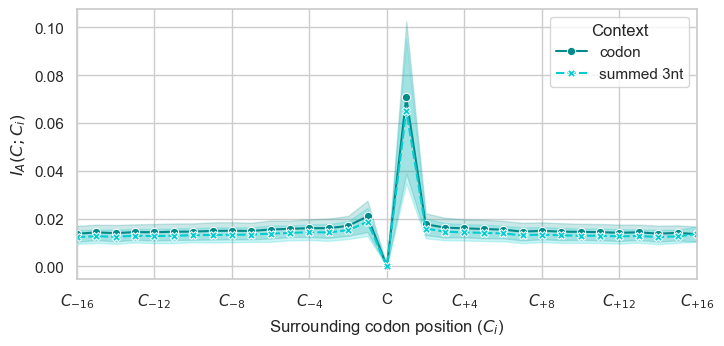

In [47]:
data2s = mi_codon_cxtCodon_3muc_long_df

sns.set_theme(font='Arial', style="whitegrid", font_scale=1)

hue_map = {"codon":"darkcyan",
           "summed 3nt":"darkturquoise"}
#generate position labels
pos33_labels = ccp.get_flat_codon_sequence_labels_formatted(33,16)
pos33_labels[16] = "C"

f, ax = plt.subplots(figsize=(8, 3.5))

f = sns.lineplot(ax=ax,
                 x="position_index",
                 y="mi_p",
                 hue="Context",
                 style="Context",
                 data=data2s,
                 palette=hue_map,
                 markers=True,
                 errorbar="sd")
ax.set_ylabel("$I_A(C;C_i)$")
ax.set_xlabel("Surrounding codon position ($C_i$)")
ax.set_xlim(0,32)

tick_settings = list(range(0, 33, 4))
tick_labels = [pos33_labels[x] for x in tick_settings]
tick_array = ax.xaxis.set_ticks(tick_settings, tick_labels)

if (True) :
    plt.savefig("../plots/Figure2Supp_graph.pdf", dpi=300, 
                bbox_inches = "tight")

# Figure 3

Show MI on shuffled and intronic contexts. Structure as before: 3 lines with SD marked.

Combine the three comparison sets

In [9]:
mi_codon_nuc_pos_df = pd.read_csv(mi_codon_nuc_pos_filename,
                                  sep="\t",
                                  index_col=0)
mi_codon_nuc_pos_long_df = pd.wide_to_long(mi_codon_nuc_pos_df.reset_index(), stubnames='mi_p', 
                             i=['index'], 
                             j='position_index').\
                                 reset_index().\
                                    rename(columns={"index":"amino_acid"}).\
                                        assign(set="CDS")
mi_codon_nuc_pos_long_df.head()

,amino_acid,position_index,mi_p,set
0,F,0,0.000898,CDS
1,L2,0,0.000539,CDS
2,L4,0,0.000987,CDS
3,I,0,0.001146,CDS
4,V,0,0.001151,CDS


In [10]:
mi_trinuc_nuc_pos_intron_df = pd.read_csv(mi_tri_nuc_pos_intronic_filename,
                                  sep="\t",
                                  index_col=0)
mi_trinuc_nuc_pos_intron_long_df = pd.wide_to_long(mi_trinuc_nuc_pos_intron_df.reset_index(), stubnames='mi_p', 
                             i=['index'], 
                             j='position_index').\
                                 reset_index().\
                                    rename(columns={"index":"amino_acid"}).\
                                        assign(set="intronic")
mi_trinuc_nuc_pos_intron_long_df.head()

,amino_acid,position_index,mi_p,set
0,F,0,0.000227,intronic
1,L2,0,0.000200,intronic
2,L4,0,0.000967,intronic
3,I,0,0.001037,intronic
4,V,0,0.001800,intronic


In [11]:
mi_codon_nuc_pos_shuffled_long_df = pd.read_csv(mi_shuffled_long_filename,
                                                sep="\t").\
                                                    assign(set="shuffled")
mi_codon_nuc_pos_shuffled_long_df.head()   

,amino_acid,position_index,mi_p,shuffle,set
0,F,0,0.000004,0,shuffled
1,L2,0,0.000009,0,shuffled
2,L4,0,0.000002,0,shuffled
3,I,0,0.000009,0,shuffled
4,V,0,0.000012,0,shuffled


In [12]:
mi_codon_nuc_comp_df = pd.concat([mi_codon_nuc_pos_long_df,
                                  mi_codon_nuc_pos_shuffled_long_df.drop(columns=["shuffle"]),
                                  mi_trinuc_nuc_pos_intron_long_df],
                                 ignore_index=True,
                                 axis=0)
mi_codon_nuc_comp_df.head()

,amino_acid,position_index,mi_p,set
0,F,0,0.000898,CDS
1,L2,0,0.000539,CDS
2,L4,0,0.000987,CDS
3,I,0,0.001146,CDS
4,V,0,0.001151,CDS


In [16]:
print(mi_codon_nuc_comp_df.query("set == 'shuffled' & mi_p > 0")["mi_p"].mean())
print(mi_codon_nuc_comp_df.query("set == 'intronic' & mi_p > 0")["mi_p"].mean())
print(mi_codon_nuc_comp_df.query("set == 'CDS' & mi_p > 0")["mi_p"].mean())

print(mi_codon_nuc_comp_df.query("set == 'intronic' & mi_p > 0")["mi_p"].std())
print(mi_codon_nuc_comp_df.query("set == 'CDS' & mi_p > 0")["mi_p"].std())

5.94744987278935e-06
0.0021130817569929637
0.004934178551480665
0.004371071662901892
0.007433196855656641


## Selected plot

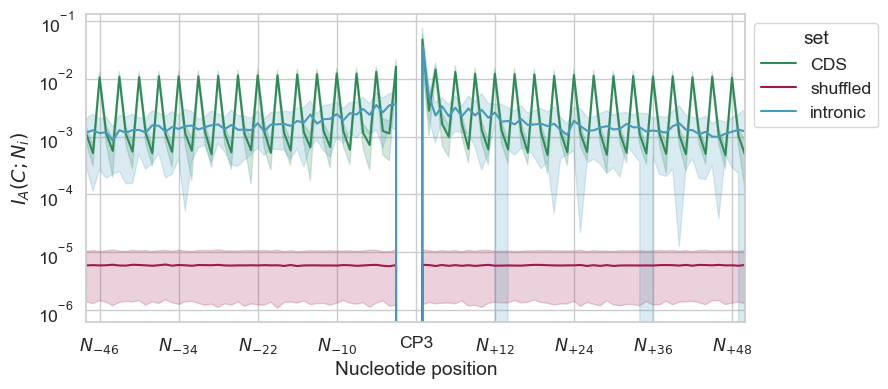

In [18]:
data3 = mi_codon_nuc_comp_df

sns.set_theme(font='Arial', style="whitegrid", font_scale=1.15)

#use the same color way as in Figure 2
hue_map = {"CDS": "seagreen",
           "shuffled": "#9e194d",
           "intronic": "#479abc"}
#generate position labels
pos101_labels = ccp.get_flat_sequence_labels_formatted(101,50)

f, ax = plt.subplots(figsize=(8.5, 4))

f = sns.lineplot(ax=ax,
                 x="position_index",
                 y="mi_p",
                 hue="set",
                 palette=hue_map,
                 data=data3,
                 errorbar="sd")
ax.set_ylabel("$I_A(C;N_i)$")
ax.set_xlabel("Nucleotide position")
ax.set_yscale("log")
ax.set_xlim(0,100)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

tick_settings = list(range(2, 101, 12))
tick_labels = [pos101_labels[x] for x in tick_settings]
tick_array = ax.xaxis.set_ticks(tick_settings, tick_labels)

if (True) :
    plt.savefig("../plots/Figure3_graph.pdf", dpi=300, 
                bbox_inches = "tight")

# Figure 4

Have a panel with all categories broken out, then one summary plot. 
* Categories: just plot averages over CP1, CP2, etc.
* Summary: show per-position trends

In [49]:
cmi_sequence_comp_df = pd.read_csv(cmi_sequence_comp_filename, sep="\t")
cmi_rna_stab_df = pd.read_csv(cmi_rna_stab_filename, sep="\t")
cmi_codon_att_df = pd.read_csv(cmi_codon_att_filename, sep="\t")

Concat these dataframes

In [50]:
cmi_var_df = pd.concat([cmi_sequence_comp_df,
                        cmi_rna_stab_df,
                        cmi_codon_att_df],
                       ignore_index=True,
                       axis=0)
cmi_var_df.head()

,amino_acid,position_index,cmi_p,variable,CP
0,F,0,0.000210,Ccount,CP1
1,L2,0,0.000284,Ccount,CP1
2,L4,0,0.000497,Ccount,CP1
3,I,0,0.000499,Ccount,CP1
4,V,0,0.000421,Ccount,CP1


In [53]:
#Look at average values
cmi_var_df.query("position_index != 51").\
    groupby(["variable", "CP"])[["position_index", "cmi_p"]].\
        agg(np.mean)

position_index     cmi_p
variable CP                           
ApTcount CP1       49.454545  0.000324
         CP2       50.500000  0.000416
         CP3       50.000000  0.004986
CSCavg   CP1       49.454545  0.000534
         CP2       50.500000  0.000803
         CP3       50.000000  0.001423
Ccount   CP1       49.454545  0.000559
         CP2       50.500000  0.000750
         CP3       50.000000  0.003732
CpGcount CP1       49.454545  0.000334
         CP2       50.500000  0.000335
         CP3       50.000000  0.003575
GCcount  CP1       49.454545  0.000340
         CP2       50.500000  0.000639
         CP3       50.000000  0.001412
TpAcount CP1       49.454545  0.000390
         CP2       50.500000  0.000380
         CP3       50.000000  0.004932
cd       CP1       49.454545  0.001276
         CP2       50.500000  0.000754
         CP3       50.000000  0.011626
cfe      CP1       49.454545  0.000588
         CP2       50.500000  0.000472
         CP3       50.000000  0.006378
efe      CP1       49.454545  0.000439
         CP2       50.500000  0.000490
         CP3       50.000000  0.003460
end      CP1       49.454545  0.001283
         CP2       50.500000  0.000758
         CP3       50.000000  0.011665
meafe    CP1       49.454545  0.000448
         CP2       50.500000  0.000427
         CP3       50.000000  0.004798
mfe      CP1       49.454545  0.000429
         CP2       50.500000  0.000477
         CP3       50.000000  0.003497
tAIavg   CP1       49.454545  0.001395
         CP2       50.500000  0.001268
         CP3       50.000000  0.009030

## Selected plot

Part A: per CP averages:

/igm/home/bsm006/miniconda3/envs/codon_context/lib/python3.8/site-packages/seaborn/utils.py:470: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  new_legend = legend_func(handles, labels, loc=loc, **props)
/igm/home/bsm006/miniconda3/envs/codon_context/lib/python3.8/site-packages/seaborn/utils.py:470: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  new_legend = legend_func(handles, labels, loc=loc, **props)


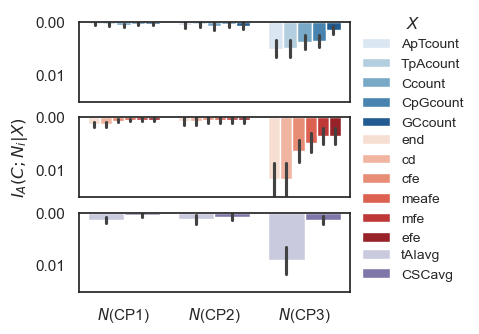

In [54]:
data4a_1 = cmi_sequence_comp_df.query("position_index != 51")
data4a_2 = cmi_rna_stab_df.query("position_index != 51")
data4a_3 = cmi_codon_att_df.query("position_index != 51")

sns.set_theme(font='Arial', style="white", font_scale=1.00)

category_palettes = {"sequence_comp":"Blues",
                     "rna_stab":"Reds",
                     "codon_att":"Purples"}

seq_order = ["ApTcount", "TpAcount",
             "Ccount","CpGcount","GCcount"]
stab_order = ["end","cd","cfe","meafe",
              "mfe", "efe"]
att_order = ["tAIavg", "CSCavg"]

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, 
                                    figsize=(3.5,3.5))

f1 = sns.barplot(ax=ax1, data=data4a_1,
                 x="CP", y="cmi_p", hue="variable",
                 palette=category_palettes["sequence_comp"],
                 errorbar="sd", hue_order=seq_order)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_ylim(0,0.015)
ax1.set_title("")
ax1.invert_yaxis()
ha1, lab1 = ax1.get_legend_handles_labels()
sns.move_legend(obj=ax1, loc="upper left", fontsize="small", title="$X$", frameon=False,
                bbox_to_anchor=(1, 1.25),
                handles=ha1,
                labels=["ApT", "TpA", "C", "CpG", "GC"])

f2 = sns.barplot(ax=ax2, data=data4a_2,
                 x="CP", y="cmi_p", hue="variable",
                 palette=category_palettes["rna_stab"],
                 errorbar="sd", hue_order=stab_order)
ax2.set_xlabel("")
ax2.set_ylabel("$I_A(C;N_i|X)$")
ax2.invert_yaxis()
ha2, lab2 = ax2.get_legend_handles_labels()
sns.move_legend(obj=ax2, loc="upper left", fontsize="small", title=None, frameon=False,
                bbox_to_anchor=(1, 0.95),
                labels=["END","CD","CFE","MEAFE","MFE","EFE"],
                handles=ha2)

f3 = sns.barplot(ax=ax3, data=data4a_3,
                 x="CP", y="cmi_p", hue="variable",
                 palette=category_palettes["codon_att"],
                 errorbar="sd", hue_order=att_order)
ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_xticks(range(3),["$N$(CP1)", "$N$(CP2)", "$N$(CP3)"])
ax3.invert_yaxis()
sns.move_legend(obj=ax3, loc="upper left", fontsize="small", title=None, frameon=False,
                bbox_to_anchor=(1, 0.70))

if (True) :
    plt.savefig("../plots/Figure4A_graph.pdf", dpi=300, 
                bbox_inches = "tight")

Save colors:

In [61]:
variable_color_map= {}
h1,l1 = ax1.get_legend_handles_labels()
h2,l2 = ax2.get_legend_handles_labels()
h3,l3 = ax3.get_legend_handles_labels()

for i,li in enumerate(l1) : variable_color_map[li] = to_hex(h1[i].get_facecolor())
for i,li in enumerate(l2) : variable_color_map[li] = to_hex(h2[i].get_facecolor())
for i,li in enumerate(l3) : variable_color_map[li] = to_hex(h3[i].get_facecolor())

Part B: per position averages

/igm/home/bsm006/miniconda3/envs/codon_context/lib/python3.8/site-packages/seaborn/utils.py:470: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  new_legend = legend_func(handles, labels, loc=loc, **props)


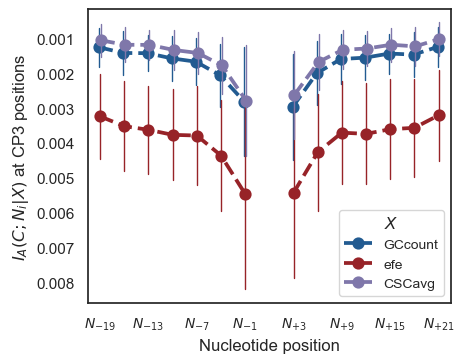

In [63]:
#setup figure size
nside = 21
p_min = 48-nside
p_max = 50+nside

variable_set = ["efe", "GCcount", "CSCavg"]

#generate position labels
pos101_labels = ccp.get_flat_sequence_labels_formatted(101,50)
cp3pos_labels = pos101_labels[p_min:(p_max+1)][2::3]

sns.set(font='Arial', style="white", font_scale=1.00)

position_query = "position_index >= @p_min & position_index <= @p_max"
variable_query = "variable.isin(@variable_set)"

data4_b = cmi_var_df.query(position_query +" & " +
                             variable_query + " & CP == 'CP3'").copy()
#replace position range
remap_position_index = dict(zip(range(p_min, p_max+1), range(p_max+1-p_min)))
data4_b["position_index_rescaled"] = data4_b["position_index"].replace(remap_position_index)

f, ax = plt.subplots(figsize=(4.5,3.5), layout="constrained")

f = sns.pointplot(x="position_index_rescaled", y="cmi_p",
                  hue="variable", 
                  errorbar="sd",
                  linestyles="--",
                  err_kws={'linewidth': 1},
                  dodge=True,
                  data=data4_b,
                  palette=ccp.context_variable_colors,
                  ax=ax)
ha, lab = ax.get_legend_handles_labels()
sns.move_legend(ax, handles=ha, labels=["GC", "EFE", "CSCavg"],
                loc="lower right", title="$X$",fontsize="small")

ax.invert_yaxis()
ax.set_ylabel("$I_A(C;N_i|X)$ at CP3 positions")
ax.set_xlabel("Nucleotide position")
xtick_loc = ax.get_xticks()
#splice together tick labels
half_tick_mark = int(len(xtick_loc)/2)
xtick_loc_new = (list(xtick_loc[:half_tick_mark:2]) + #[half_tick_mark] + 
                 list(xtick_loc[(half_tick_mark+1)::2]))
c3pos_lab_new = (list(cp3pos_labels[:half_tick_mark:2]) + #[cp3pos_labels[half_tick_mark]] + 
                 list(cp3pos_labels[(half_tick_mark+1)::2]))

ax.set_xticks(xtick_loc_new, c3pos_lab_new, fontsize="small")
#ax.set_title("CMI $I_A(C;N_i|X)$ at CP3 positions")

if (True) :
    plt.savefig("../plots/Figure4B_graph.pdf", dpi=300, 
                bbox_inches = "tight")

# Figure 5

In [64]:
mi_var_combined_df = pd.read_csv(mi_var_combined_filename,
                                 sep="\t")
mi_var_combined_df.head()

,amino_acid,mi,variable
0,F,0.048565,CSCavg
1,L2,0.030982,CSCavg
2,L4,0.067254,CSCavg
3,I,0.081848,CSCavg
4,V,0.070078,CSCavg


In [65]:
#Which amino acid classes show up at top of each variable?
for var in mi_var_combined_df["variable"].unique() :
    print(mi_var_combined_df.query("variable == @var").sort_values("mi",
                                                             ascending=False).head())


   amino_acid        mi variable
3           I  0.081848   CSCavg
16          E  0.077821   CSCavg
4           V  0.070078   CSCavg
2          L4  0.067254   CSCavg
9           A  0.058701   CSCavg
   amino_acid        mi variable
37          E  0.002301      end
33          Q  0.001845      end
30          A  0.001820      end
23         L4  0.001778      end
25          V  0.001745      end
   amino_acid        mi variable
58          E  0.002634       cd
54          Q  0.002091       cd
51          A  0.001961       cd
56          K  0.001960       cd
44         L4  0.001947       cd
   amino_acid        mi variable
79          E  0.085218  GCcount
66          I  0.082296  GCcount
72          A  0.072845  GCcount
67          V  0.071565  GCcount
65         L4  0.067748  GCcount
    amino_acid        mi  variable
93           A  0.070682  CpGcount
91           P  0.060520  CpGcount
100          E  0.052581  CpGcount
89          S4  0.049772  CpGcount
87           I  0.047722  CpGcoun

In [58]:
#Which amino acid classes show up at top of each variable?
for aa in mi_var_combined_df["amino_acid"].unique() :
    print(mi_var_combined_df.query("amino_acid == @aa").sort_values("mi",
                                                             ascending=False).head())

    amino_acid        mi variable
21           F  0.054668  GCcount
105          F  0.048847  GCtrans
84           F  0.048565   CSCavg
147          F  0.048397   Ccount
210          F  0.046425   GCgene
    amino_acid        mi variable
190         L2  0.040805      efe
169         L2  0.039856      mfe
22          L2  0.033040  GCcount
106         L2  0.031060  GCtrans
85          L2  0.030982   CSCavg
    amino_acid        mi variable
23          L4  0.067748  GCcount
86          L4  0.067254   CSCavg
191         L4  0.060445      efe
170         L4  0.059970      mfe
107         L4  0.059666  GCtrans
    amino_acid        mi variable
24           I  0.082296  GCcount
87           I  0.081848   CSCavg
108          I  0.077500  GCtrans
213          I  0.071707   GCgene
150          I  0.063870   Ccount
    amino_acid        mi variable
25           V  0.071565  GCcount
88           V  0.070078   CSCavg
109          V  0.065571  GCtrans
193          V  0.064117      efe
172          V

In [66]:
#Read in file of amino acid attributes
aa_attrib_syn_df = pd.read_csv(aa_attrib_syn_filename,
                               sep="\t")
aa_attrib_syn_df.head()

,AminoAcid_sub,Degeneracy,GC_bases,Freq_per_k,h,AminoAcid,Polarity,MI_p1,MI_avg,MI_nop1_avg,MI_eq_p1,MI_eq_avg,MI_eq_nop1_avg
0,F,2.0,0.500000,37.9,0.691474,F,Nonpolar,0.079302,0.005042,0.004284,0.079904,0.005022,0.004258
1,L2,2.0,0.500000,20.6,0.664786,L,Nonpolar,0.004859,0.001716,0.001684,0.004859,0.001716,0.001684
2,L4,4.0,1.500000,79.6,1.211468,L,Nonpolar,0.051991,0.005683,0.005210,0.051940,0.005619,0.005146
3,I,3.0,0.333333,44.3,1.031249,I,Nonpolar,0.043454,0.006253,0.005874,0.042626,0.006236,0.005864
4,V,4.0,1.500000,60.7,1.266124,V,Nonpolar,0.049554,0.005621,0.005172,0.049745,0.005616,0.005166


In [67]:
mi_var_combined_ann_df = mi_var_combined_df.merge(aa_attrib_syn_df,
                                                  left_on="amino_acid",
                                                  right_on="AminoAcid_sub",
                                                  how="left")
mi_var_combined_ann_df.head()

,amino_acid,mi,variable,AminoAcid_sub,Degeneracy,GC_bases,Freq_per_k,h,AminoAcid,Polarity,MI_p1,MI_avg,MI_nop1_avg,MI_eq_p1,MI_eq_avg,MI_eq_nop1_avg
0,F,0.048565,CSCavg,F,2.0,0.500000,37.9,0.691474,F,Nonpolar,0.079302,0.005042,0.004284,0.079904,0.005022,0.004258
1,L2,0.030982,CSCavg,L2,2.0,0.500000,20.6,0.664786,L,Nonpolar,0.004859,0.001716,0.001684,0.004859,0.001716,0.001684
2,L4,0.067254,CSCavg,L4,4.0,1.500000,79.6,1.211468,L,Nonpolar,0.051991,0.005683,0.005210,0.051940,0.005619,0.005146
3,I,0.081848,CSCavg,I,3.0,0.333333,44.3,1.031249,I,Nonpolar,0.043454,0.006253,0.005874,0.042626,0.006236,0.005864
4,V,0.070078,CSCavg,V,4.0,1.500000,60.7,1.266124,V,Nonpolar,0.049554,0.005621,0.005172,0.049745,0.005616,0.005166


In [72]:
mi_var_combined_ann_df["GC_bases"] = mi_var_combined_ann_df["GC_bases"].apply(lambda x: round(x,2))
mi_var_combined_ann_df["Degeneracy"] = mi_var_combined_ann_df["Degeneracy"].astype(int)
mi_var_combined_ann_df.head()

,amino_acid,mi,variable,AminoAcid_sub,Degeneracy,GC_bases,Freq_per_k,h,AminoAcid,Polarity,MI_p1,MI_avg,MI_nop1_avg,MI_eq_p1,MI_eq_avg,MI_eq_nop1_avg
0,F,0.048565,CSCavg,F,2,0.50,37.9,0.691474,F,Nonpolar,0.079302,0.005042,0.004284,0.079904,0.005022,0.004258
1,L2,0.030982,CSCavg,L2,2,0.50,20.6,0.664786,L,Nonpolar,0.004859,0.001716,0.001684,0.004859,0.001716,0.001684
2,L4,0.067254,CSCavg,L4,4,1.50,79.6,1.211468,L,Nonpolar,0.051991,0.005683,0.005210,0.051940,0.005619,0.005146
3,I,0.081848,CSCavg,I,3,0.33,44.3,1.031249,I,Nonpolar,0.043454,0.006253,0.005874,0.042626,0.006236,0.005864
4,V,0.070078,CSCavg,V,4,1.50,60.7,1.266124,V,Nonpolar,0.049554,0.005621,0.005172,0.049745,0.005616,0.005166


## Selected plot

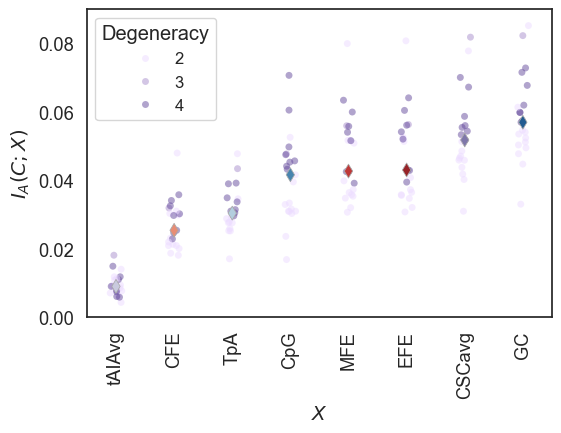

In [73]:
#setup figure size
variable_set = ["GCcount", "CSCavg",
                "efe", "mfe",
                "CpGcount", "TpAcount",
                 "cfe","tAIavg"][::-1]
variable_labels = ["tAIAvg", "CFE", "TpA",
                   "CpG", "MFE", "EFE", "CSCavg", "GC"]

sns.set_theme(font='Arial', style="white", font_scale=1.20)

variable_query = "variable.isin(@variable_set)"

data5 = mi_var_combined_ann_df.query(variable_query)

f, ax = plt.subplots(figsize=(6,4))

data5_ov = data5.groupby("variable").agg({"mi":np.median}).reset_index()
ax = sns.scatterplot(
    data=data5_ov.set_index("variable").loc[variable_set].reset_index(), 
    x="variable",
    y="mi", 
    hue="variable",
    marker="d", 
    s=50, 
    alpha=1.0,
    legend=False, 
    palette=ccp.context_variable_colors,
    edgecolor="darkgray"
)

plt.setp(ax.lines, zorder=100)
plt.setp(ax.collections, zorder=100, label="")

sns.stripplot(
    data=data5, x="variable", y="mi", 
    hue="Degeneracy",
    dodge=False, alpha=.50, 
    order=variable_set, 
    ax=ax,
    palette=ccp.aa_degeneracy_colors
)

ax.set_ylim(0,0.09)
sns.move_legend(ax, loc="upper left", title="Degeneracy",fontsize="small")
ax.set_ylabel("$I_A(C;X)$")
ax.set_xlabel("$X$")

tick_settings = range(len(variable_set))
tick_array = ax.xaxis.set_ticks(tick_settings, variable_labels)
ax.tick_params(axis="x", rotation=90)

if (True) :
    plt.savefig("../plots/Figure5_graph.pdf", dpi=300, 
                bbox_inches = "tight")

# Supp Figure 3

Format:
* Summary plot
* Graph of amino acid ranges

In [74]:
cmi_gc_sequence_df = pd.read_csv(cmi_sequence_comp_filename, sep="\t").\
    query("variable == 'GCcount'").copy()
cmi_gc_sequence_df.head()

,amino_acid,position_index,cmi_p,variable,CP
6363,F,0,0.000197,GCcount,CP1
6364,L2,0,0.000234,GCcount,CP1
6365,L4,0,0.000404,GCcount,CP1
6366,I,0,0.000435,GCcount,CP1
6367,V,0,0.000345,GCcount,CP1


Add column to demarcate upstream and downstream
And column for distance to central codon

In [75]:
cmi_gc_sequence_df["direction"] = cmi_gc_sequence_df["position_index"].apply(lambda x:
    "upstream" if x <48 else "downstream" if x>50 else "central codon")
cmi_gc_sequence_df["distance"] = cmi_gc_sequence_df.apply(lambda r:
    48-r["position_index"] if r["direction"] == "upstream" else
    r["position_index"]-50 if r["direction"] == "downstream" else
    0,
    axis=1)
cmi_gc_sequence_df.head()

,amino_acid,position_index,cmi_p,variable,CP,direction,distance
6363,F,0,0.000197,GCcount,CP1,upstream,48
6364,L2,0,0.000234,GCcount,CP1,upstream,48
6365,L4,0,0.000404,GCcount,CP1,upstream,48
6366,I,0,0.000435,GCcount,CP1,upstream,48
6367,V,0,0.000345,GCcount,CP1,upstream,48


In [76]:
cmi_gc_sequence_df.query("amino_acid == 'G' & CP == 'CP3' & distance < 21")

,amino_acid,position_index,cmi_p,variable,CP,direction,distance
6992,G,29,0.002402,GCcount,CP3,upstream,19
7055,G,32,0.002583,GCcount,CP3,upstream,16
7118,G,35,0.002266,GCcount,CP3,upstream,13
7181,G,38,0.003179,GCcount,CP3,upstream,10
7244,G,41,0.002410,GCcount,CP3,upstream,7
7307,G,44,0.002930,GCcount,CP3,upstream,4
7370,G,47,0.005620,GCcount,CP3,upstream,1
7433,G,50,NaN,GCcount,CP3,central codon,0
7496,G,53,0.005402,GCcount,CP3,downstream,3
7559,G,56,0.004001,GCcount,CP3,downstream,6


In [77]:
cmi_gc_range_df = pd.read_csv(cmi_gc_range_filename,
                              sep="\t")
cmi_gc_range_df.head()

,AminoAcid,CMI_base_avg_up,CMI_base_sd_up,CMI_base_avg_down,CMI_base_sd_down,cp3_range_up,cp3_range_down
0,F,0.000847,0.000069,0.000919,0.000092,5,5
1,L2,0.000437,0.000067,0.000439,0.000053,1,0
2,L4,0.001007,0.000089,0.001079,0.000061,5,6
3,I,0.001367,0.000122,0.001359,0.000121,4,5
4,V,0.001095,0.000066,0.001170,0.000058,6,6


In [78]:
#Convert to long
cmi_gc_range_long_df = pd.wide_to_long(cmi_gc_range_df,
                                       stubnames='cp3_range',
                                       sep="_",
                                       suffix='\D+',
                                       i=['AminoAcid'],
                                       j='direction').reset_index()
cmi_gc_range_long_df["direction"] = cmi_gc_range_long_df["direction"]+"stream"
cmi_gc_range_long_df.head()

,AminoAcid,direction,CMI_base_avg_down,CMI_base_avg_up,CMI_base_sd_up,CMI_base_sd_down,cp3_range
0,F,upstream,0.000919,0.000847,0.000069,0.000092,5
1,L2,upstream,0.000439,0.000437,0.000067,0.000053,1
2,L4,upstream,0.001079,0.001007,0.000089,0.000061,5
3,I,upstream,0.001359,0.001367,0.000122,0.000121,4
4,V,upstream,0.001170,0.001095,0.000066,0.000058,6


In [79]:
cmi_gc_range_df.query("AminoAcid == 'G'")

,AminoAcid,CMI_base_avg_up,CMI_base_sd_up,CMI_base_avg_down,CMI_base_sd_down,cp3_range_up,cp3_range_down
20,G,0.002041,0.000159,0.001979,0.000201,3,5


Match up with codon attributes:

In [80]:
aa_attrib_syn_df = pd.read_csv(aa_attrib_syn_filename,
                               sep="\t")
aa_attrib_syn_df.head()

,AminoAcid_sub,Degeneracy,GC_bases,Freq_per_k,h,AminoAcid,Polarity,MI_p1,MI_avg,MI_nop1_avg,MI_eq_p1,MI_eq_avg,MI_eq_nop1_avg
0,F,2.0,0.500000,37.9,0.691474,F,Nonpolar,0.079302,0.005042,0.004284,0.079904,0.005022,0.004258
1,L2,2.0,0.500000,20.6,0.664786,L,Nonpolar,0.004859,0.001716,0.001684,0.004859,0.001716,0.001684
2,L4,4.0,1.500000,79.6,1.211468,L,Nonpolar,0.051991,0.005683,0.005210,0.051940,0.005619,0.005146
3,I,3.0,0.333333,44.3,1.031249,I,Nonpolar,0.043454,0.006253,0.005874,0.042626,0.006236,0.005864
4,V,4.0,1.500000,60.7,1.266124,V,Nonpolar,0.049554,0.005621,0.005172,0.049745,0.005616,0.005166


## Selected plot

In [81]:
#Set AA order
aa_order = cmi_gc_range_df["AminoAcid"][(cmi_gc_range_df["cp3_range_up"] + cmi_gc_range_df["cp3_range_down"]).sort_values(ascending=False).index]

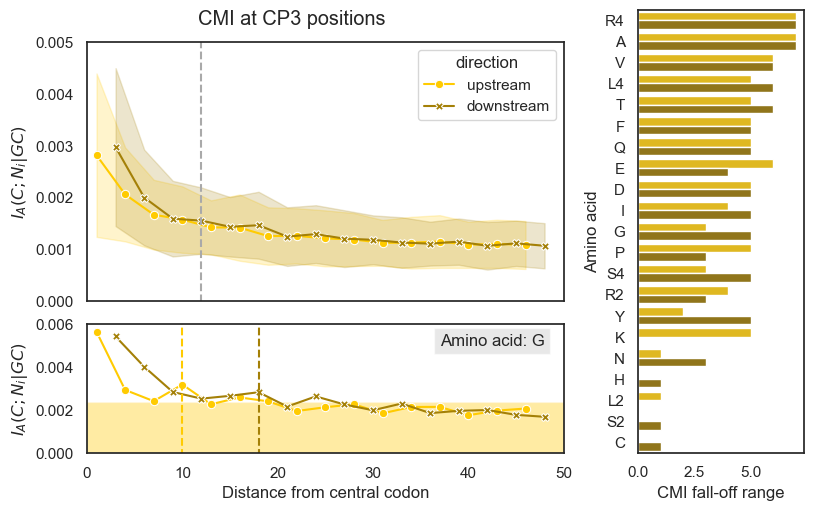

In [82]:
sns.set_theme(font='Arial', style="white", font_scale=1.00)

f = plt.figure(layout='constrained', figsize=(8, 5))
subf = f.subfigures(1, 2, wspace=0.01, width_ratios=[2.5, 1])

amino_acid = 'G'
data3s_a = cmi_gc_sequence_df.query("distance > 0 & CP == 'CP3'")
data3s_b = data3s_a.query("amino_acid == @amino_acid")
data3s_c = cmi_gc_range_long_df
data3s_b2 = cmi_gc_range_df.query("AminoAcid == @amino_acid")
#Get column indexes
avg_up_idx = list(data3s_b2.columns).index("CMI_base_avg_up")
avg_dn_idx = list(data3s_b2.columns).index("CMI_base_avg_down")
std_up_idx = list(data3s_b2.columns).index("CMI_base_sd_up")
std_dn_idx = list(data3s_b2.columns).index("CMI_base_sd_down")

f3s_palette = {"upstream":"#ffcb01",
               "downstream":"#a48007"}

#specify linestyles
direction_dashes = {"upstream":'', "downstream":''}
axs1 = subf[0].subplots(2, 1, sharex=True, height_ratios=[2,1])
subf[0].suptitle("CMI at CP3 positions")
sns.lineplot(data=data3s_a,
             x="distance",
             y="cmi_p",
             hue="direction",
             errorbar="sd", 
             style="direction",
             dashes=direction_dashes,
             markers=True,
             palette=f3s_palette,
             ax=axs1[0])
#Add vertical line
axs1[0].plot([12,12],[-1,1],"--", color="darkgray")
sns.lineplot(data=data3s_b,
             x="distance",
             y="cmi_p",
             hue="direction",
             style="direction",
             dashes=direction_dashes,
             markers=True,
             palette=f3s_palette,
             ax=axs1[1])
axs1[0].set_ylim(0,0.005)
axs1[1].set_ylim(0,0.006)
axs1[1].set_xlim(0,50)

axs1[1].get_legend().remove()
#subf[0].suptitle("CMI")
axs1[0].set_ylabel("$I_A(C;N_i|GC)$")
axs1[1].set_ylabel("$I_A(C;N_i|GC)$")
axs1[1].set_xlabel("Distance from central codon")
axs1[1].text(37, 0.005, "Amino acid: "+amino_acid, 
             bbox=dict(facecolor='lightgray', alpha=0.5))
#add rectangles
avg_up = data3s_b2.iat[0,avg_up_idx]
avg_dn = data3s_b2.iat[0,avg_dn_idx]
std_up = data3s_b2.iat[0,std_up_idx]
std_dn = data3s_b2.iat[0,std_dn_idx]
threshold_up = avg_up+2*std_up
threshold_dn = avg_dn+2*std_dn
#-- try lines instead
axs1[1].plot([10]*2,[-1,1], "--",
             color=f3s_palette["upstream"]) #Just look up value from above
axs1[1].plot([18]*2,[-1,1], "--",
             color=f3s_palette["downstream"])
axs1[1].add_patch(Rectangle((-1, 0), 55, threshold_up,
                  facecolor = f3s_palette["upstream"],
                  alpha=0.2,
                  fill=True))
axs1[1].add_patch(Rectangle((-1, 0), 55, threshold_dn,
                  facecolor = f3s_palette["upstream"],
                  alpha=0.2,
                  fill=True))

axs2 = subf[1].subplots(1)

axs2 = sns.barplot(ax=axs2,
                   data=data3s_c,
                   y="AminoAcid",
                   x="cp3_range",
                   hue="direction",
                   palette=f3s_palette,
                   order=aa_order)
axs2.get_legend().remove()
axs2.set_ylabel("Amino acid")
axs2.set_xlabel("CMI fall-off range")

if (True) :
    plt.savefig("../plots/Figure3Supp_graph.pdf", dpi=300, 
                bbox_inches = "tight")

# Figure 6

Show:
* Bias factor as a function of nucleotide position and nucleotide at position
* Grouped  by CP3 nucleotide
* Add in separate graph for +1 values?

In [13]:
codon_nuc_bias_df = pd.read_csv(codon_nuc_bias_filename,
                                sep="\t")
codon_nuc_bias_df.head()                                
                                

,AminoAcid,AminoAcid_count,Codon,Position,Nucleotide,P_Codon,Pa_Pos_N,Pa_Codon_Pos_N,bias_factor
0,F,372028,TTT,N-12,A,0.47108,0.267219,0.133025,0.007342
1,F,372028,TTT,N-12,T,0.47108,0.201074,0.096791,0.002092
2,F,372028,TTT,N-12,C,0.47108,0.228808,0.100089,-0.007416
3,F,372028,TTT,N-12,G,0.47108,0.302899,0.141175,-0.001507
4,F,372028,TTT,N-11,A,0.47108,0.303117,0.149776,0.007152


In [14]:
codon_nuc_bias_df["CP3"] = codon_nuc_bias_df["Codon"].apply(lambda x:x[2])
codon_nuc_bias_df["pos_num"] = codon_nuc_bias_df["Position"].apply(lambda x:int(x[1:]))
codon_nuc_bias_df.head()

,AminoAcid,AminoAcid_count,Codon,Position,Nucleotide,P_Codon,Pa_Pos_N,Pa_Codon_Pos_N,bias_factor,CP3,pos_num
0,F,372028,TTT,N-12,A,0.47108,0.267219,0.133025,0.007342,T,-12
1,F,372028,TTT,N-12,T,0.47108,0.201074,0.096791,0.002092,T,-12
2,F,372028,TTT,N-12,C,0.47108,0.228808,0.100089,-0.007416,T,-12
3,F,372028,TTT,N-12,G,0.47108,0.302899,0.141175,-0.001507,T,-12
4,F,372028,TTT,N-11,A,0.47108,0.303117,0.149776,0.007152,T,-11


In [15]:
#Add in dummy rows for CP3 position
dummy_rows = {"AminoAcid":["F"]*4,
              "CP3":["A","T","C","G"],
              "Nucleotide":["A","T","C","G"],
              "Position":["CP3"]*4,
              "pos_num":[0]*4,
              "bias_factor":[np.nan]*4}
dummy_df = pd.DataFrame(dummy_rows)
codon_nuc_bias_dum_df = pd.concat([codon_nuc_bias_df[codon_nuc_bias_df["Position"].str.contains("\-")],
                                   dummy_df,
                                   codon_nuc_bias_df[codon_nuc_bias_df["Position"].str.contains("\+")]],
                                  axis=0,
                                  ignore_index=True)
codon_nuc_bias_dum_df.loc[(codon_nuc_bias_dum_df["pos_num"] == 1),
                          "bias_factor"] = np.nan
codon_nuc_bias_dum_df

,AminoAcid,AminoAcid_count,Codon,Position,Nucleotide,P_Codon,Pa_Pos_N,Pa_Codon_Pos_N,bias_factor,CP3,pos_num
0,F,372028.0,TTT,N-12,A,0.471080,0.267219,0.133025,0.007342,T,-12
1,F,372028.0,TTT,N-12,T,0.471080,0.201074,0.096791,0.002092,T,-12
2,F,372028.0,TTT,N-12,C,0.471080,0.228808,0.100089,-0.007416,T,-12
3,F,372028.0,TTT,N-12,G,0.471080,0.302899,0.141175,-0.001507,T,-12
4,F,372028.0,TTT,N-11,A,0.471080,0.303117,0.149776,0.007152,T,-11
...,...,...,...,...,...,...,...,...,...,...,...
5663,G,665741.0,GGG,N+11,G,0.244864,0.213335,0.054041,0.001833,G,11
5664,G,665741.0,GGG,N+12,A,0.244864,0.180875,0.040049,-0.004031,G,12
5665,G,665741.0,GGG,N+12,T,0.244864,0.226047,0.049727,-0.005328,G,12
5666,G,665741.0,GGG,N+12,C,0.244864,0.320161,0.081796,0.003473,G,12


## Selected plot

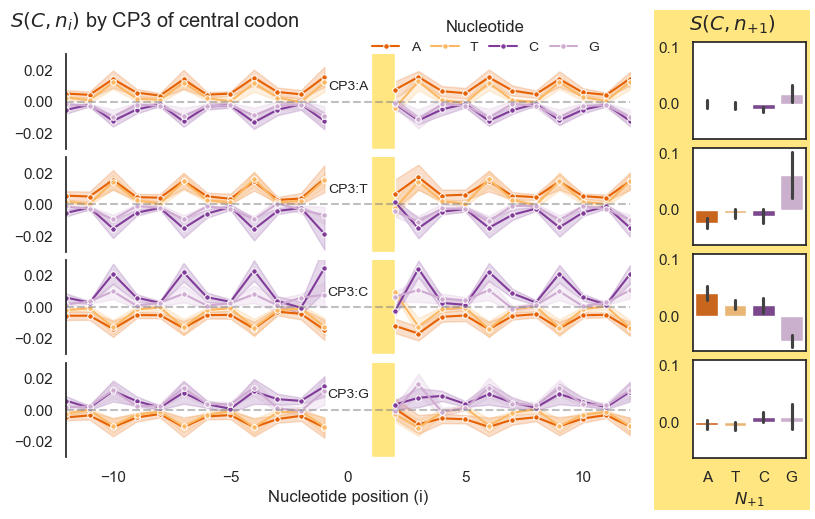

In [19]:
sns.set_theme(font='Arial', style="white", font_scale=1.0)

f = plt.figure(layout='constrained', figsize=(8, 5))
subf = f.subfigures(1, 2, wspace=0.05, width_ratios=[4, 1])

data6_a = codon_nuc_bias_dum_df
data6_b = codon_nuc_bias_df.query("pos_num == 1")

nuc_order = ["A", "T", "C", "G"]
highlight_color = "#ffe680"

ax_left = subf[0].subplots(4,1, sharey=True, sharex=True)
for i, axl in enumerate(ax_left) : #lineplot
    this_nuc = nuc_order[i]
    data6_a_sub = data6_a.query("CP3 == @this_nuc")
    if i == 0 :
        legend_set = "auto"
    else :
        legend_set = False
    sns.lineplot(data=data6_a_sub.query("pos_num < 0"),
                 x="pos_num",
                 y="bias_factor",
                 hue="Nucleotide",
                 errorbar="sd",
                 marker="o",
                 markersize=4,
                 palette=ccp.nuc_colors,
                 hue_order= nuc_order,
                 ax=axl, legend=legend_set)
    if i == 0:
        sns.move_legend(axl, "upper left", fontsize="small", title="Nucleotide", 
                        frameon=False, columnspacing=0.8,
                        bbox_to_anchor=(0.52, 1.5), ncol=4)
    else :
        pass
    sns.lineplot(data=data6_a_sub.query("pos_num > 1"),
                 x="pos_num",
                 y="bias_factor",
                 hue="Nucleotide",
                 errorbar="sd",
                 marker="o",
                 markersize=4,
                 palette=ccp.nuc_colors,
                 hue_order= nuc_order,
                 ax=axl, legend=False)
    axl.set_ylabel("")
    axl.spines["top"].set_visible(False)
    axl.spines["bottom"].set_visible(False)
    axl.spines["right"].set_visible(False)
    axl.text(0.01,0.0075,"CP3:"+str(this_nuc),ha="center",
             fontsize="small")
    
    axl.set_xlim(-12,12)
    axl.set_ylim(-0.03,0.03)
    axl.axhline(0.0, alpha=0.5, color="gray", linestyle="--")
    axl.add_patch(Rectangle((1, -0.03), 1, 0.5,
                  facecolor = highlight_color,
                  fill=True))
axl.set_xlabel("Nucleotide position (i)")
axl.set
subf[0].suptitle("$S(C,n_i)$ by CP3 of central codon",
                 x=0,y=1.0,
                 ha="left")

ax_right = subf[1].subplots(4,1, sharey=True, sharex=True)
for i, axr in enumerate(ax_right) :
    this_nuc = nuc_order[i]
    data6_b_sub = data6_b.query("CP3 == @this_nuc")
    sns.barplot(data=data6_b_sub,
                x="Nucleotide",
                y="bias_factor",
                errorbar="sd",
                hue="Nucleotide",
                palette=ccp.nuc_colors,
                order=nuc_order,
                ax=axr)
    axr.set_ylabel("")
    axr.set_xlabel("")
axr.set_xlabel("$N_{+1}$")
subf[1].suptitle("$S(C,n_{+1})$", ha="center")
subf[1].set_facecolor(highlight_color)

if (True) :
    plt.savefig("../plots/Figure6_graph.pdf", dpi=300, 
                bbox_inches = "tight")


# Supp Figure 4

Attributes of the codon context score

In [12]:
variant_scored_gnomad_pos_fraction_mean = pd.read_csv(variant_weight_xPositionGroup_xSNVContext_filename,
                                                      sep="\t")
variant_scored_gnomad_pos_fraction_mean.head()

,SNVContext,N-3,N-2,N-1,N+1,N+2,N+3,CP1,CP2,CP3
0,A>C,0.034414,0.031215,0.114263,0.219819,0.071526,0.129277,0.074541,0.065845,0.259101
1,A>G,0.050534,0.031320,0.146780,0.099379,0.041283,0.145961,0.105490,0.082739,0.296515
2,A>T,0.061794,0.067946,0.100961,0.196720,0.145821,0.068686,0.094084,0.092512,0.171478
3,C>A,0.031293,0.029810,0.118025,0.180915,0.070928,0.131848,0.072687,0.063796,0.300698
4,C>G,0.031973,0.052842,0.078497,0.298193,0.090318,0.098623,0.076950,0.053684,0.218920


Convert from  wide to long:

In [13]:
vsfrac_pos_long_df = pd.melt(variant_scored_gnomad_pos_fraction_mean,
                             id_vars=["SNVContext"],
                             value_vars=variant_scored_gnomad_pos_fraction_mean.columns[1:],
                             var_name="position",
                             value_name="diff_score")
vsfrac_pos_long_df.head()

,SNVContext,position,diff_score
0,A>C,N-3,0.034414
1,A>G,N-3,0.050534
2,A>T,N-3,0.061794
3,C>A,N-3,0.031293
4,C>G,N-3,0.031973


In [14]:
vsfrac_pos_long_df["diff_score"].max()

0.3345021143913306

## Selected plot

A>A
A>T
A>C
A>G
T>A
T>T
T>C
T>G
C>A
C>T
CpG>TpG
C>G
G>A
G>T
G>C
CpG>CpA


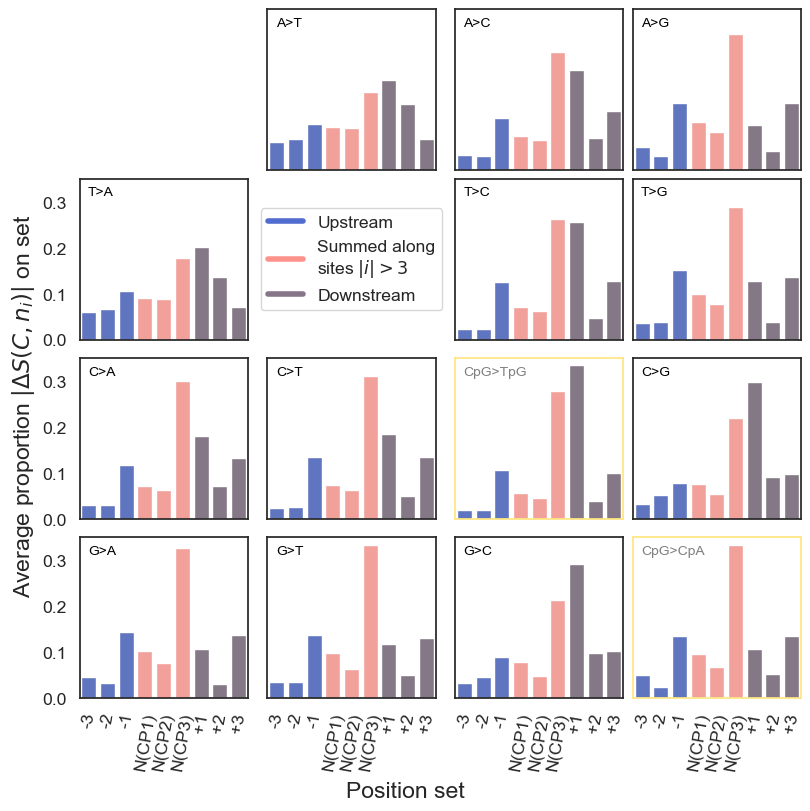

In [18]:
sns.set_theme(font='Arial', style="white", font_scale=1.15)

f, axs = plt.subplots(4, 4, layout='constrained', figsize=(8,8),
                      sharex=True, sharey=True)

data4s = vsfrac_pos_long_df

pos_palette = {"N-3": "#506ccf",
           "N-2": "#506ccf",
           "N-1": "#506ccf",
           "CP1": "#ff938c",
           "CP2": "#ff938c",
           "CP3": "#ff938c",
           "N+1": "#867589",
           "N+2": "#867589",
           "N+3": "#867589"}
pos_order = ["N-3", "N-2", "N-1",
             "CP1", "CP2", "CP3",
             "N+1", "N+2", "N+3"]
pos_labels = ["-3",  "-2", "-1",
               "N(CP1)", "N(CP2)", "N(CP3)",
               "+1",  "+2", "+3"]
textcolor = "darkgray"

nuc_order = ["A","T","C","G"]
for i, ref_nuc in enumerate(nuc_order) :
    for j, alt_nuc in enumerate(nuc_order) :
        if (ref_nuc == "C" and alt_nuc == "C") :
            snv_con = "CpG>TpG"
        elif (ref_nuc == "G" and alt_nuc == "G") :
            snv_con = "CpG>CpA"
        else :
            snv_con = ref_nuc+">"+alt_nuc
            
        print(snv_con)
        
        ax_current = axs[i,j]
        
        if i == 1 and j == 1 :
            ax_current.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
            ax_current.xaxis.set_visible(False)
            ax_current.yaxis.set_visible(False)
            
            bar_lines = [Line2D([0], [0], color=pos_palette["N-1"], lw=4),
                         Line2D([0], [0], color=pos_palette["CP1"], lw=4),
                         Line2D([0], [0], color=pos_palette["N+1"], lw=4)]
            bar_labels = ["Upstream", "Summed along\nsites $|i| > 3$",
                          "Downstream"]
            ax_current.legend(bar_lines, bar_labels, loc="center")
            
        elif (i == 0 and j == 0) :
            
            ax_current.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
            ax_current.xaxis.set_visible(False)
            ax_current.yaxis.set_visible(False)
            
        else :
            data4s_con = data4s.query("SNVContext == @snv_con")
            
            sns.barplot(data=data4s_con,
                        x="position",
                        y="diff_score",
                        order=pos_order,
                        hue="position",
                        legend=False,
                        palette=pos_palette, #[pos_palette[x] for x in pos_order],
                        ax=ax_current)
            
            ax_current.set_xlabel("")
            ax_current.set_ylabel("")
            
            #Adjust for the bottom of the plot
            if i == 3 :
                ax_current.xaxis.set_ticks(ticks=pos_order, 
                                           labels=pos_labels)
                ax_current.tick_params(axis="x", rotation=80)
                
            if "p" in snv_con :
                ax_current.tick_params(color='#ffe680')
                for spine in ax_current.spines.values():
                    spine.set_edgecolor('#ffe680')
                    
                textcolor = "gray"
            else :
                ax_current.tick_params(color='black')
                textcolor = "black"
                
            ax_current.text(0.05, 0.95, 
                            snv_con,
                            color=textcolor,
                            horizontalalignment='left',
                            verticalalignment='top',
                            transform=ax_current.transAxes,
                            fontsize=10)
    
f.supylabel("Average proportion $|\Delta S(C,n_i)|$ on set")
f.supxlabel("Position set")

if (True) :
    plt.savefig("../plots/Figure4Supp_graph.pdf", dpi=300, 
                bbox_inches = "tight")

# Figure 7

Show constraint relationship

Change from wide to long and filter to match what was used for the fits:

In [19]:
constraint_variant_df = pd.read_csv(constraint_variant_filename,
                                    sep="\t")
constraint_variant_df.head()

,diff_sum_context_score_REF_Codon_zscore_binned,SNVContext,y_mean,y_std,y_rand_mean,y_rand_std,N,diff_sum_context_score_REF_Codon_zscore_binned_left
0,0,A>C,0.050887,0.219770,0.056225,0.230359,44962,-4.893927
1,0,A>G,0.238241,0.426033,0.231994,0.422131,8164,-4.893927
2,0,C>A,0.057888,0.233542,0.070444,0.255905,12265,-4.893927
3,0,C>G,0.071429,0.267261,0.214286,0.425815,14,-4.893927
4,0,C>T,0.251644,0.433974,0.237159,0.425356,13531,-4.893927


In [20]:
#Read in curve fit information:
constraint_curve_fits_df = pd.read_csv(constraint_curve_filename,
                                       sep="\t").set_index("group_label")
constraint_curve_fits_df.head()

,group_variable,y_variable,r1_x0,r1_x1,r1_x0_pv,r1_x1_pv,r1_rsq_adj
group_label,,,,,,,
A>C,SNVContext,y_mean,0.055544,0.002346,2.683252e-119,1.044242e-17,0.524170
A>G,SNVContext,y_mean,0.179461,-0.001188,3.674384e-143,6.461575e-02,0.024563
A>T,SNVContext,y_mean,0.040679,0.019842,3.394397e-74,1.132109e-24,0.795802
C>A,SNVContext,y_mean,0.071544,0.006183,6.206382e-131,1.645867e-36,0.802516
C>G,SNVContext,y_mean,0.084596,0.035563,2.788518e-83,7.788825e-39,0.838708


In [21]:
constraint_curve_fits_rand_df = pd.read_csv(constraint_curve_rand_filename,
                                       sep="\t").set_index("group_label")
constraint_curve_fits_rand_df.head()

,group_variable,y_variable,r1_x0,r1_x1,r1_x0_pv,r1_x1_pv,r1_rsq_adj
group_label,,,,,,,
A>C,SNVContext,y_rand_mean,0.054805,-0.000084,4.952189e-131,0.616270,-0.007605
A>G,SNVContext,y_rand_mean,0.179474,-0.000855,7.513538e-142,0.195030,0.007045
A>T,SNVContext,y_rand_mean,0.042326,0.000267,4.422485e-96,0.653850,-0.012040
C>A,SNVContext,y_rand_mean,0.070809,0.000589,9.988872e-149,0.004109,0.071611
C>G,SNVContext,y_rand_mean,0.095972,0.001122,8.427440e-126,0.078790,0.022450


In [22]:
constraint_variant_mean_df = pd.melt(constraint_variant_df, 
                                     id_vars=['diff_sum_context_score_REF_Codon_zscore_binned',
                                     'diff_sum_context_score_REF_Codon_zscore_binned_left',
                                     'SNVContext',
                                     'N'],
                                     value_vars=['y_mean', 'y_rand_mean'],
                                     var_name='Set', value_name='y')
constraint_variant_mean_df.head()

,diff_sum_context_score_REF_Codon_zscore_binned,diff_sum_context_score_REF_Codon_zscore_binned_left,SNVContext,N,Set,y
0,0,-4.893927,A>C,44962,y_mean,0.050887
1,0,-4.893927,A>G,8164,y_mean,0.238241
2,0,-4.893927,C>A,12265,y_mean,0.057888
3,0,-4.893927,C>G,14,y_mean,0.071429
4,0,-4.893927,C>T,13531,y_mean,0.251644


In [23]:
#Change labeling of data set
constraint_variant_mean_df["Set"] = constraint_variant_mean_df["Set"].replace({"y_mean":"Observed", 
                                                                               "y_rand_mean":"Shuffled"})
constraint_variant_mean_df.head()

,diff_sum_context_score_REF_Codon_zscore_binned,diff_sum_context_score_REF_Codon_zscore_binned_left,SNVContext,N,Set,y
0,0,-4.893927,A>C,44962,Observed,0.050887
1,0,-4.893927,A>G,8164,Observed,0.238241
2,0,-4.893927,C>A,12265,Observed,0.057888
3,0,-4.893927,C>G,14,Observed,0.071429
4,0,-4.893927,C>T,13531,Observed,0.251644


Apply filter to match curve fits:

In [24]:
constraint_variant_mean_filtered_df = constraint_variant_mean_df.query("N >= 1000")

<AxesSubplot: >

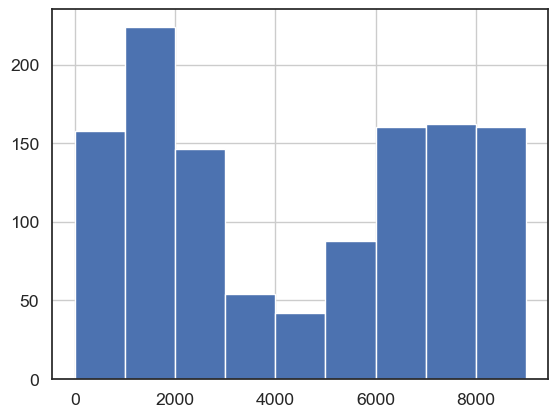

In [25]:
constraint_variant_mean_df["N"].hist(bins=np.arange(0,10000,1000))

## Selected plot

In [26]:
#Constrained contexts
constrained_contexts = ['A>C', 'A>T', 'C>A', 'C>G', 'C>T', 'CpG>CpA', 'CpG>TpG', 'G>A', 'G>C']
#Size filtering
ncut = 4000

A>A
A>T
A>C
A>G
T>A
T>T
T>C
T>G
C>A
C>T
CpG>TpG
C>G
G>A
G>T
G>C
CpG>CpA


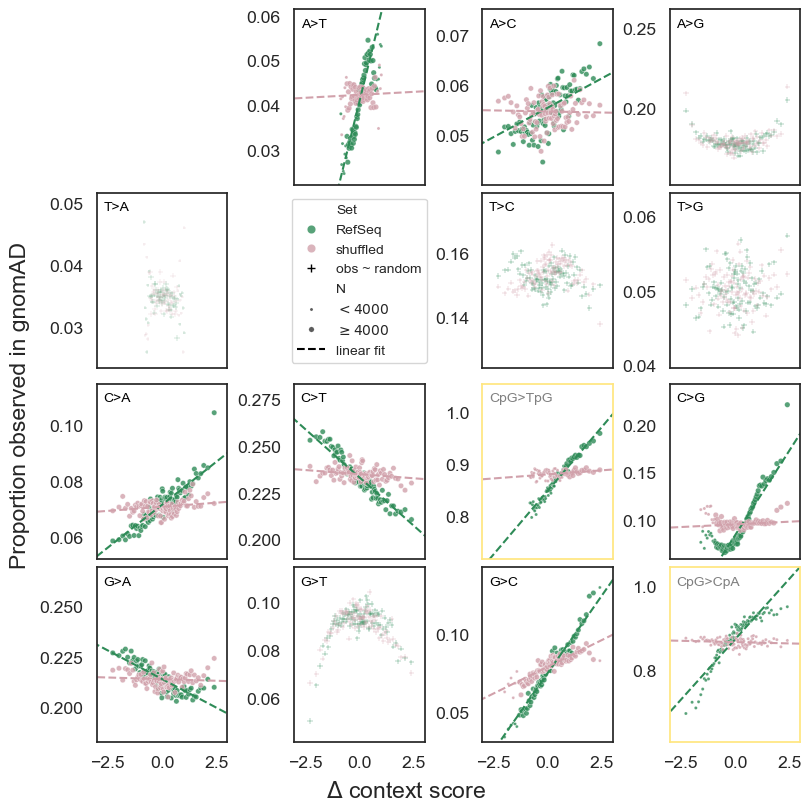

In [28]:
sns.set_theme(font='Arial', style="whitegrid", font_scale=1.25)

f, axs = plt.subplots(4, 4, layout='constrained', figsize=(8,8),
                      sharex=True, sharey=False)

data8_1 = constraint_variant_mean_filtered_df.copy()
data8_2 = constraint_curve_fits_df
data8_3 = constraint_curve_fits_rand_df

data8_1["nmin"] = (data8_1["N"] >= ncut)*1

hue_map = {"Observed": "seagreen",
           "Shuffled": "#D1A1AB"} #related to the color we have for "shuffled" in a previous plot

nuc_order = ["A","T","C","G"]
for i, ref_nuc in enumerate(nuc_order) :
    for j, alt_nuc in enumerate(nuc_order) :
        if (ref_nuc == "C" and alt_nuc == "C") :
            snv_con = "CpG>TpG"
        elif (ref_nuc == "G" and alt_nuc == "G") :
            snv_con = "CpG>CpA"
        else :
            snv_con = ref_nuc+">"+alt_nuc
            
        print(snv_con)
            
        data8_con = data8_1.query("SNVContext == @snv_con")
        ax_current = axs[i,j]
        
        if data8_con.shape[0] == 0 :
            ax_current.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
            ax_current.xaxis.set_visible(False)
            ax_current.yaxis.set_visible(False)
        else :
            #Determine formatting parameters
            marker_set = []
            if snv_con in constrained_contexts :
                marker = "o"
                if list(data8_con["nmin"].unique()).count(0) > 0 :
                    marker_set.append(5)
                else :
                    pass
                if list(data8_con["nmin"].unique()).count(1) > 0 :
                    marker_set.append(15)
                else :
                    pass
            else : 
                marker = "+"
                if list(data8_con["nmin"].unique()).count(0) > 0 :
                    marker_set.append(5)
                else :
                    pass
                if list(data8_con["nmin"].unique()).count(1) > 0 :
                    marker_set.append(15)
                else :
                    pass
                
            sns.scatterplot(data=data8_con,
                            x="diff_sum_context_score_REF_Codon_zscore_binned_left",
                            y="y",
                            hue="Set",
                            marker = marker,
                            size="nmin",
                            sizes=marker_set,
                            #size="N",
                            ax=ax_current,
                            palette=hue_map,
                            alpha=0.80)
            
            #If this is a constrained context, add linear line fit
            if snv_con in constrained_contexts :
                b_current = constraint_curve_fits_df.loc[snv_con,"r1_x0"]
                m_current = constraint_curve_fits_df.loc[snv_con,"r1_x1"]
                b_rand_current = constraint_curve_fits_rand_df.loc[snv_con,"r1_x0"]
                m_rand_current = constraint_curve_fits_rand_df.loc[snv_con,"r1_x1"]
                x_val = [-5,5]
                y_val = [linear_y(x, b_current, m_current) for x in x_val]
                y_val_rand = [linear_y(x, b_rand_current, m_rand_current) for x in x_val]
                
                ax_current.plot(x_val,y_val,"--",color=hue_map["Observed"],label="Observed")
                ax_current.plot(x_val,y_val_rand,"--",color=hue_map["Shuffled"],label="Shuffled")
            else :
                pass
            
            ax_current.get_legend().remove()
            
            ax_current.set_xlim(-3,3)
            ymin_ = data8_con["y"].min()*0.90
            ymax_ = data8_con["y"].max()*1.10
            ax_current.set_ylim(ymin_, ymax_)
            
            ax_current.set_xlabel("")
            ax_current.set_ylabel("")
            
            ax_current.spines[['top', 'right', 'left', 'bottom']].set_visible(True)
            
            if "p" in snv_con :
                ax_current.tick_params(color='#ffe680')
                for spine in ax_current.spines.values():
                    spine.set_edgecolor('#ffe680')
                    
                textcolor = "gray"
            else :
                ax_current.tick_params(color='black')
                textcolor = "black"
                
            ax_current.text(0.05, 0.95, snv_con,
                            color=textcolor,
                            horizontalalignment='left',
                            verticalalignment='top',
                            transform=ax_current.transAxes,
                            fontsize=10)

#Grab the right collection of handles and labels 
h1, l1 = axs[1,0].get_legend_handles_labels() #unconstrained
h2, l2 = axs[0,1].get_legend_handles_labels() #constrained
#-make neutral representation of line fit
line_fit_handle = plt.Line2D([0,0],[0,0],color="black", linestyle='--')
#-make neutral representation of uncontrained symbols
uncon_handle = plt.Line2D([0,0],[0,0],color="black", marker='+', linestyle='') #h1[1]
uncon_handle.set_color("black")
#--assemble
handles = [h2[0], #Set
           h2[1], #Observed circle 
           h2[2], #Shuffled circle
           uncon_handle, #Black plus
           h2[3], #N
           h2[4], #Small circle
           h2[5], #Bigger circle,
           line_fit_handle] #black dashed line
labels = ["Set", "RefSeq", "shuffled", "obs ~ random", 
          "N", "$<4000$", "$\geq 4000$", 
          "linear fit"]

axs[1,1].legend(handles, labels, loc="center", fontsize=10)
f.supylabel("Proportion observed in gnomAD")
f.supxlabel("$\Delta$ context score")

if (True) :
    plt.savefig("../plots/Figure7_graph.pdf", dpi=300, 
                bbox_inches = "tight")

# Figure 8

Results on TCGA

In [31]:
enrichment_df = pd.read_csv(thresholds_5_brca_ucec_chisquare,
                            sep="\t")
enrichment_df.head()

,cohort,group,context,threshold_quantile,threshold_value,comparison,cohort_number_in,cohort_number_out,cohort_expected_in,cohort_expected_out,test_stat,test_pv
0,BRCA,SNVContext,A>C,0.05,-2.294995,below,9,187,10,186,0.105376,7.454708e-01
1,BRCA,SNVContext,A>T,0.05,-0.440518,below,10,272,14,268,1.202559,2.728109e-01
2,BRCA,SNVContext,C>A,0.05,-1.727480,below,43,1016,54,1005,2.361139,1.243914e-01
3,BRCA,SNVContext,C>G,0.05,-0.699761,below,134,911,53,992,130.406364,3.339179e-30
4,BRCA,SNVContext,C>T,0.05,-1.572423,below,149,2818,152,2815,0.062408,8.027302e-01


Add ratio:

In [32]:
enrichment_df["ratio_expected"] = enrichment_df["cohort_expected_in"]/(enrichment_df["cohort_expected_in"]+enrichment_df["cohort_expected_out"])
enrichment_df["ratio_somatic"] = enrichment_df["cohort_number_in"]/(enrichment_df["cohort_number_in"]+enrichment_df["cohort_number_out"])
enrichment_df.head()

,cohort,group,context,threshold_quantile,threshold_value,comparison,cohort_number_in,cohort_number_out,cohort_expected_in,cohort_expected_out,test_stat,test_pv,ratio_expected,ratio_somatic
0,BRCA,SNVContext,A>C,0.05,-2.294995,below,9,187,10,186,0.105376,7.454708e-01,0.051020,0.045918
1,BRCA,SNVContext,A>T,0.05,-0.440518,below,10,272,14,268,1.202559,2.728109e-01,0.049645,0.035461
2,BRCA,SNVContext,C>A,0.05,-1.727480,below,43,1016,54,1005,2.361139,1.243914e-01,0.050992,0.040604
3,BRCA,SNVContext,C>G,0.05,-0.699761,below,134,911,53,992,130.406364,3.339179e-30,0.050718,0.128230
4,BRCA,SNVContext,C>T,0.05,-1.572423,below,149,2818,152,2815,0.062408,8.027302e-01,0.051230,0.050219


In [33]:
#Filter
pv_max = (0.05/(9*5))
enrichment_filter_df = enrichment_df.query("ratio_somatic > ratio_expected & test_pv < @pv_max")
enrichment_filter_df

,cohort,group,context,threshold_quantile,threshold_value,comparison,cohort_number_in,cohort_number_out,cohort_expected_in,cohort_expected_out,test_stat,test_pv,ratio_expected,ratio_somatic
3,BRCA,SNVContext,C>G,0.05,-0.699761,below,134,911,53,992,130.406364,3.339179e-30,0.050718,0.128230
7,BRCA,SNVContext,G>A,0.05,-1.709938,below,197,2556,138,2615,26.555804,2.560344e-07,0.050127,0.071558
13,UCEC,SNVContext,C>T,0.05,-1.572423,below,958,11759,652,12065,151.374458,8.680499e-35,0.051270,0.075332
16,UCEC,SNVContext,G>A,0.05,-1.709938,below,643,10396,555,10484,14.691803,1.265958e-04,0.050276,0.058248
21,grouped_TCGA,SNVContext,C>G,0.05,-0.699761,below,156,1291,74,1373,95.762170,1.295477e-22,0.051140,0.107809
22,grouped_TCGA,SNVContext,C>T,0.05,-1.572423,below,1105,14555,803,14857,119.717868,7.292912e-28,0.051277,0.070562
25,grouped_TCGA,SNVContext,G>A,0.05,-1.709938,below,837,12920,691,13066,32.479456,1.204592e-08,0.050229,0.060842


In [34]:
#Convert from wide to long
enrichment_filter_long_df = pd.melt(enrichment_filter_df,
                                    id_vars=["cohort", "context",
                                             "test_stat","test_pv"],
                                    value_vars=["ratio_expected",
                                                "ratio_somatic"],
                                    var_name="set",
                                    value_name="ratio")
#-add different labels to try to parse cases
enrichment_filter_long_df["coh_cxt_set_label"] = (enrichment_filter_long_df["cohort"]+"_"+
                                      enrichment_filter_long_df["context"]+"_"+
                                      enrichment_filter_long_df["set"])
enrichment_filter_long_df["coh_cxt_label"] = (enrichment_filter_long_df["cohort"]+"_"+
                                      enrichment_filter_long_df["context"])
#-set categorical column to help with sorting
cohort_order_list = ["BRCA", "UCEC", "grouped_TCGA"]
enrichment_filter_long_df["cohort"] = \
    enrichment_filter_long_df["cohort"].astype("category").\
        cat.set_categories(cohort_order_list,ordered=True)
#-sort values
enrichment_filter_long_df = enrichment_filter_long_df.sort_values(["cohort","context","set"],
                                                                  ascending=[True, True, False])
enrichment_filter_long_df

,cohort,context,test_stat,test_pv,set,ratio,coh_cxt_set_label,coh_cxt_label
7,BRCA,C>G,130.406364,3.339179e-30,ratio_somatic,0.128230,BRCA_C>G_ratio_somatic,BRCA_C>G
0,BRCA,C>G,130.406364,3.339179e-30,ratio_expected,0.050718,BRCA_C>G_ratio_expected,BRCA_C>G
8,BRCA,G>A,26.555804,2.560344e-07,ratio_somatic,0.071558,BRCA_G>A_ratio_somatic,BRCA_G>A
1,BRCA,G>A,26.555804,2.560344e-07,ratio_expected,0.050127,BRCA_G>A_ratio_expected,BRCA_G>A
9,UCEC,C>T,151.374458,8.680499e-35,ratio_somatic,0.075332,UCEC_C>T_ratio_somatic,UCEC_C>T
2,UCEC,C>T,151.374458,8.680499e-35,ratio_expected,0.051270,UCEC_C>T_ratio_expected,UCEC_C>T
10,UCEC,G>A,14.691803,1.265958e-04,ratio_somatic,0.058248,UCEC_G>A_ratio_somatic,UCEC_G>A
3,UCEC,G>A,14.691803,1.265958e-04,ratio_expected,0.050276,UCEC_G>A_ratio_expected,UCEC_G>A
11,grouped_TCGA,C>G,95.762170,1.295477e-22,ratio_somatic,0.107809,grouped_TCGA_C>G_ratio_somatic,grouped_TCGA_C>G
4,grouped_TCGA,C>G,95.762170,1.295477e-22,ratio_expected,0.051140,grouped_TCGA_C>G_ratio_expected,grouped_TCGA_C>G


In [35]:
gsea_summary_df = pd.read_csv(gsea_summary_chi2_filename,
                              sep="\t")
gsea_summary_df.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,cohort,number_sampled_in_random
0,KEGG_2021_Human,Protein processing in endoplasmic reticulum,8/171,0.006622,0.958501,0,0,3.050291,15.304373,SEC61A1;SEC24A;MAN1A2;UBE4B;DNAJC5G;STT3B;UGGT...,BRCA_5q,0
1,KEGG_2021_Human,Non-homologous end-joining,2/13,0.017927,0.958501,0,0,11.174432,44.937142,RAD50;LIG4,BRCA_5q,0
2,KEGG_2021_Human,Ubiquitin mediated proteolysis,6/140,0.025962,0.958501,0,0,2.769318,10.111073,HERC2;UBR5;UBE4B;BRCA1;BTRC;CBL,BRCA_5q,0
3,KEGG_2021_Human,Homologous recombination,3/41,0.028089,0.958501,0,0,4.860584,17.363799,RAD50;RAD51C;BRCA1,BRCA_5q,0
4,KEGG_2021_Human,PPAR signaling pathway,4/74,0.031491,0.958501,0,0,3.523450,12.184308,HMGCS1;ACOX1;EHHADH;PLIN2,BRCA_5q,0


In [36]:
#Calculate transformation of p-value
gsea_summary_df["minus_logp"] = -1*np.log10(gsea_summary_df["Adjusted P-value"])
#-add gene list size
gsea_summary_df["gene_set_size"] = gsea_summary_df["Overlap"].apply(lambda x:
    int(x.split("/")[1]))
#-add list percentage
gsea_summary_df["fraction_overlap"] = gsea_summary_df.apply(lambda r: 
    float(r["Overlap"].split("/")[0])/r["gene_set_size"],
    axis=1)
#Filter
gsea_summary_filtered_df = gsea_summary_df.query("number_sampled_in_random == 0").\
    query("cohort.str.contains('5q')").\
        query("`Adjusted P-value` < 0.05").\
            query("gene_set_size > 10").\
            sort_values("minus_logp", ascending=False).copy()

In [37]:
gsea_summary_df.query("number_sampled_in_random > 0")

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,cohort,number_sampled_in_random,minus_logp,gene_set_size,fraction_overlap
5958,KEGG_2021_Human,ECM-receptor interaction,18/88,0.000315,0.031592,0,0,2.831053,22.827795,ITGB1;LAMA2;LAMA1;ITGB3;ITGA2;ITGA1;LAMB4;TNC;...,BRCA_UCEC_5q,35,1.500427,88,0.204545


Mark GO terms that are cautioned for annotation

In [38]:
go_restriction_list = ["Protein Alpha-1,2-Demannosylation (GO:0036508)", 
                       "Peptidyl-Serine Modification (GO:0018209)",
                       "Peptidyl-Serine Phosphorylation (GO:0018105)"]
gsea_summary_filtered_df["GO_restricted"] = gsea_summary_filtered_df["Term"].apply(lambda x:
    True if x in go_restriction_list else False)
gsea_summary_filtered_df.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,cohort,number_sampled_in_random,minus_logp,gene_set_size,fraction_overlap,GO_restricted
5956,KEGG_2021_Human,Herpes simplex virus 1 infection,89/498,5.323906e-12,1.602496e-09,0,0,2.456442,63.766331,ZNF254;ZNF573;IFNA5;ZNF253;ZNF492;ITGB3;TBK1;Z...,BRCA_UCEC_5q,0,8.795203,498,0.178715,False
2029,KEGG_2021_Human,Herpes simplex virus 1 infection,75/498,9.394906e-12,2.780892e-09,0,0,2.627076,66.703695,ZNF254;ZNF573;ZNF492;ITGB3;TBK1;ZNF729;ZNF529;...,UCEC_5q,0,8.555816,498,0.150602,False
5957,KEGG_2021_Human,Homologous recombination,12/41,9.141805e-05,1.375842e-02,0,0,4.549486,42.310528,POLD3;TOP3B;BRIP1;RAD50;RAD51C;XRCC2;RPA2;ATM;...,BRCA_UCEC_5q,0,1.861432,41,0.292683,False
225,GO_Biological_Process_2023,Isotype Switching (GO:0045190),4/11,1.990371e-05,1.796310e-02,0,0,35.347709,382.624963,MSH6;SANBR;RNF8;LIG4,BRCA_5q,0,1.745619,11,0.363636,False
6257,GO_Biological_Process_2023,Nuclear Pore Organization (GO:0006999),8/14,4.534526e-06,1.810183e-02,0,0,14.642686,180.160530,NDC1;NUP107;SEH1L;NUP133;TPR;NUP153;NUP98;RTN4,BRCA_UCEC_5q,0,1.742278,14,0.571429,False


In [39]:
#Code abbreviated labels for the pathways
Term_abbrev_dict = {'Herpes simplex virus 1 infection':'HSV1 infection',
 'Homologous recombination':'Homologous\nrecombination',
 'Somatic Recombination Of Immunoglobulin Genes Involved In Immune Response (GO:0002204)':'Somatic recomb. of Ig genes\nduring immune response\n(GO:0002204)',
 'Isotype Switching (GO:0045190)':'Isotype switching\n(GO:0045190)',
 'Nuclear Pore Organization (GO:0006999)':'Nuclear pore\norganization(GO:0006999)',
 'Protein Alpha-1,2-Demannosylation (GO:0036508)':r'Protein $\alpha$-1,2-Demannosylation\n(BP)',
 'DNA Damage Response (GO:0006974)':'DNA damage response\n(GO:0006974)',
 'Nucleocytoplasmic Transport (GO:0006913)':'Nucleocytoplasmic\ntransport(GO:0006913)',
 'Nuclear Transport (GO:0051169)':'Nuclear transport\n(GO:0051169)',
 'Nuclear Pore Complex Assembly (GO:0051292)':'Nuclear pore complex\nassembly(GO:0051292)',
 'Cellular Response To Interferon-Alpha (GO:0035457)':'Cellular response to\n'+r'IFN-$\alpha$(GO:0035457)',
 'Lysine degradation':'Lysine degradation',
 'DNA Repair (GO:0006281)':'DNA repair\n(GO:0006281)',
 'Peptidyl-Serine Modification (GO:0018209)':'Peptidyl-Serine Modification\n(GO:0018209)',
 'Peptidyl-Serine Phosphorylation (GO:0018105)':'Peptidyl-Serine Phosphorylation\n(GO:0018105)'}
gsea_summary_filtered_df["Term_label"] = gsea_summary_filtered_df["Term"].map(Term_abbrev_dict)
gsea_summary_filtered_df.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,cohort,number_sampled_in_random,minus_logp,gene_set_size,fraction_overlap,GO_restricted,Term_label
5956,KEGG_2021_Human,Herpes simplex virus 1 infection,89/498,5.323906e-12,1.602496e-09,0,0,2.456442,63.766331,ZNF254;ZNF573;IFNA5;ZNF253;ZNF492;ITGB3;TBK1;Z...,BRCA_UCEC_5q,0,8.795203,498,0.178715,False,HSV1 infection
2029,KEGG_2021_Human,Herpes simplex virus 1 infection,75/498,9.394906e-12,2.780892e-09,0,0,2.627076,66.703695,ZNF254;ZNF573;ZNF492;ITGB3;TBK1;ZNF729;ZNF529;...,UCEC_5q,0,8.555816,498,0.150602,False,HSV1 infection
5957,KEGG_2021_Human,Homologous recombination,12/41,9.141805e-05,1.375842e-02,0,0,4.549486,42.310528,POLD3;TOP3B;BRIP1;RAD50;RAD51C;XRCC2;RPA2;ATM;...,BRCA_UCEC_5q,0,1.861432,41,0.292683,False,Homologous\nrecombination
225,GO_Biological_Process_2023,Isotype Switching (GO:0045190),4/11,1.990371e-05,1.796310e-02,0,0,35.347709,382.624963,MSH6;SANBR;RNF8;LIG4,BRCA_5q,0,1.745619,11,0.363636,False,Isotype switching\n(GO:0045190)
6257,GO_Biological_Process_2023,Nuclear Pore Organization (GO:0006999),8/14,4.534526e-06,1.810183e-02,0,0,14.642686,180.160530,NDC1;NUP107;SEH1L;NUP133;TPR;NUP153;NUP98;RTN4,BRCA_UCEC_5q,0,1.742278,14,0.571429,False,Nuclear pore\norganization(GO:0006999)


In [40]:
#Filter on GO restriction
gsea_summary_filtered_noRestict_df = gsea_summary_filtered_df.query("GO_restricted == False")

In [41]:
gsea_summary_filtered_df.query("GO_restricted == True")

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,cohort,number_sampled_in_random,minus_logp,gene_set_size,fraction_overlap,GO_restricted,Term_label
6259,GO_Biological_Process_2023,"Protein Alpha-1,2-Demannosylation (GO:0036508)",8/16,0.000017,0.022190,0,0,10.980815,120.806196,EDEM3;RNF139;MAN1A2;EDEM2;MAN1C1;UGGT2;UGGT1;M...,BRCA_UCEC_5q,0,1.653851,16,0.500000,True,"Protein $\alpha$-1,2-Demannosylation\n(BP)"
6265,GO_Biological_Process_2023,Peptidyl-Serine Modification (GO:0018209),29/166,0.000117,0.047316,0,0,2.337464,21.153572,GALNT13;POGLUT1;ROCK1;PRKDC;TNKS;LRRK2;TTK;TBK...,BRCA_UCEC_5q,0,1.324988,166,0.174699,True,Peptidyl-Serine Modification\n(GO:0018209)
6266,GO_Biological_Process_2023,Peptidyl-Serine Phosphorylation (GO:0018105),28/158,0.000119,0.047316,0,0,2.377857,21.496682,ROCK1;PRKDC;TNKS;LRRK2;TTK;TBK1;STK38;TLK1;MAP...,BRCA_UCEC_5q,0,1.324988,158,0.177215,True,Peptidyl-Serine Phosphorylation\n(GO:0018105)


In [42]:
gsea_summary_df.query("number_sampled_in_random == 0").\
    query("cohort.str.contains('5q')").\
        query("`Adjusted P-value` < 0.05").\
            query("gene_set_size <= 10")

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,cohort,number_sampled_in_random,minus_logp,gene_set_size,fraction_overlap
224,GO_Biological_Process_2023,Somatic Recombination Of Immunoglobulin Genes ...,4/9,0.000008,0.014072,0,0,49.491824,582.117258,MSH6;SANBR;RNF8;LIG4,BRCA_5q,0,1.851646,9,0.444444
6262,GO_Biological_Process_2023,Nuclear Pore Complex Assembly (GO:0051292),6/10,0.000054,0.035679,0,0,16.455090,161.811020,NDC1;NUP107;TPR;NUP153;NUP98;RTN4,BRCA_UCEC_5q,0,1.447593,10,0.600000
6263,GO_Biological_Process_2023,Cellular Response To Interferon-Alpha (GO:0035...,5/7,0.000075,0.042609,0,0,27.411730,260.461344,RO60;PDE12;PYHIN1;TPR;IFNAR1,BRCA_UCEC_5q,0,1.370496,7,0.714286


In [43]:
gsea_summary_filtered_noRestict_df

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,cohort,number_sampled_in_random,minus_logp,gene_set_size,fraction_overlap,GO_restricted,Term_label
5956,KEGG_2021_Human,Herpes simplex virus 1 infection,89/498,5.323906e-12,1.602496e-09,0,0,2.456442,63.766331,ZNF254;ZNF573;IFNA5;ZNF253;ZNF492;ITGB3;TBK1;Z...,BRCA_UCEC_5q,0,8.795203,498,0.178715,False,HSV1 infection
2029,KEGG_2021_Human,Herpes simplex virus 1 infection,75/498,9.394906e-12,2.780892e-09,0,0,2.627076,66.703695,ZNF254;ZNF573;ZNF492;ITGB3;TBK1;ZNF729;ZNF529;...,UCEC_5q,0,8.555816,498,0.150602,False,HSV1 infection
5957,KEGG_2021_Human,Homologous recombination,12/41,9.141805e-05,1.375842e-02,0,0,4.549486,42.310528,POLD3;TOP3B;BRIP1;RAD50;RAD51C;XRCC2;RPA2;ATM;...,BRCA_UCEC_5q,0,1.861432,41,0.292683,False,Homologous\nrecombination
225,GO_Biological_Process_2023,Isotype Switching (GO:0045190),4/11,1.990371e-05,1.796310e-02,0,0,35.347709,382.624963,MSH6;SANBR;RNF8;LIG4,BRCA_5q,0,1.745619,11,0.363636,False,Isotype switching\n(GO:0045190)
6257,GO_Biological_Process_2023,Nuclear Pore Organization (GO:0006999),8/14,4.534526e-06,1.810183e-02,0,0,14.642686,180.160530,NDC1;NUP107;SEH1L;NUP133;TPR;NUP153;NUP98;RTN4,BRCA_UCEC_5q,0,1.742278,14,0.571429,False,Nuclear pore\norganization(GO:0006999)
2325,GO_Biological_Process_2023,DNA Damage Response (GO:0006974),49/384,5.569501e-06,2.022286e-02,0,0,2.132688,25.801692,TOP2A;WDR48;BRCA1;FMN2;INSL6;NIPBL;KMT5B;MACRO...,UCEC_5q,0,1.694157,384,0.127604,False,DNA damage response\n(GO:0006974)
6258,GO_Biological_Process_2023,DNA Damage Response (GO:0006974),57/384,1.625267e-05,2.218956e-02,0,0,1.937672,21.367205,TOP2A;WDR48;BRCA1;FMN2;INSL6;NIPBL;HERC2;KMT5B...,BRCA_UCEC_5q,0,1.653851,384,0.148438,False,DNA damage response\n(GO:0006974)
6260,GO_Biological_Process_2023,Nucleocytoplasmic Transport (GO:0006913),14/50,4.181175e-05,3.567856e-02,0,0,4.279182,43.144136,NDC1;NUP214;AHCTF1;NUP107;SEH1L;NUP133;NUP153;...,BRCA_UCEC_5q,0,1.447593,50,0.280000,False,Nucleocytoplasmic\ntransport(GO:0006913)
6261,GO_Biological_Process_2023,Nuclear Transport (GO:0051169),12/39,5.298463e-05,3.567856e-02,0,0,4.887019,48.115191,NDC1;NUP214;AHCTF1;NUP107;SEH1L;XPO1;NUP133;NU...,BRCA_UCEC_5q,0,1.447593,39,0.307692,False,Nuclear transport\n(GO:0051169)
5959,KEGG_2021_Human,Lysine degradation,14/63,5.943528e-04,4.472505e-02,0,0,3.141654,23.336322,SETD2;KMT2A;KMT2C;BBOX1;ACAT2;CAMKMT;EHHADH;NS...,BRCA_UCEC_5q,0,1.349449,63,0.222222,False,Lysine degradation


In [50]:
data8_c["fraction_overlap"]

5957    0.292683
225     0.363636
6257    0.571429
6260    0.280000
6261    0.307692
5959    0.222222
6264    0.151203
Name: fraction_overlap, dtype: float64

## Selected plot

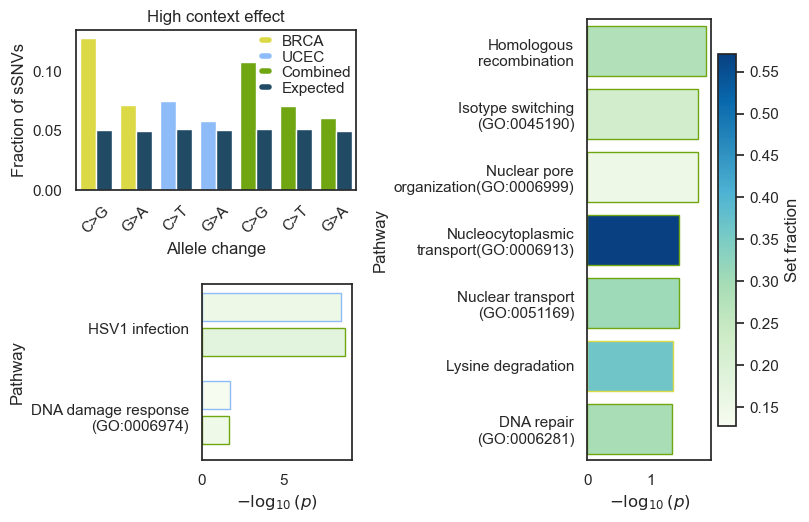

In [61]:
sns.set_theme(font='Arial', style="white", font_scale=1.00)

f = plt.figure(layout='constrained', figsize=(8, 5))
subf = f.subfigures(1, 2, wspace=0.03,
                    width_ratios=[1,1.25])

#get double counts:
double_terms = [x for x in gsea_summary_filtered_noRestict_df["Term"].unique()
                if gsea_summary_filtered_noRestict_df["Term"].value_counts()[x] > 1]
data8_a = enrichment_filter_long_df
data8_b = gsea_summary_filtered_noRestict_df.query("Term.isin(@double_terms)")
data8_c = gsea_summary_filtered_noRestict_df.query("~Term.isin(@double_terms)")
#color bar 
hue_norm = (gsea_summary_filtered_noRestict_df["fraction_overlap"].min(),
            gsea_summary_filtered_noRestict_df["fraction_overlap"].max())
norm = plt.Normalize(hue_norm[0], 
                     hue_norm[1])
sm = plt.cm.ScalarMappable(cmap="GnBu", norm=norm)

#Colors
f8_palette = {"ratio_expected":"#214a65",
              "ratio_somatic":"#5f86b7",
              "BRCA":"#dcd947",
              "UCEC":"#8dbcf9",
              "Combined":"#70a612"}
f8a_colors = ([f8_palette["BRCA"]]*2+
              [f8_palette["UCEC"]]*2+
              [f8_palette["Combined"]]*3+
              [f8_palette["ratio_expected"]]*7)
f8b_colors = ([f8_palette["UCEC"]]*2+
              [f8_palette["Combined"]]*2)
f8c_colors = [f8_palette["Combined"] if "BRCA_UCEC" in y else 
              f8_palette["BRCA"] if "BRCA" in y else 
              f8_palette["UCEC"]for y in data8_c["cohort"]]

#Context labels
cxt_labels = [x.split("_")[-1] for
              x in data8_a["coh_cxt_label"].unique()]

#Left side
axs1 = subf[0].subplots(2, 1, 
                        sharex=False, 
                        sharey=False,
                        height_ratios=[1.5,1])
sns.barplot(data=data8_a,
            x="coh_cxt_label",
            y="ratio",
            hue="set",
            ax=axs1[0])
axs1[0].set_xlabel("Allele change")
axs1[0].set_ylabel("Fraction of sSNVs")
axs1[0].set_title("High context effect")
axs1[0].set_xticks(ticks=range(len(cxt_labels)), labels=cxt_labels)
axs1[0].tick_params(axis="x", rotation=45)
axs1[0].get_legend().remove()
#Customize colors of bars
bar_i = 0
for bar_group in axs1[0].containers:
    for bar in bar_group :
        bar.set_facecolor(f8a_colors[bar_i])
        bar_i += 1
axs1[0].set_position([.2, .65, .8, .32])
#Customize legend
fig8a_lines = [Line2D([0], [0], color=f8_palette["BRCA"], lw=4),
                Line2D([0], [0], color=f8_palette["UCEC"], lw=4),
                Line2D([0], [0], color=f8_palette["Combined"], lw=4),
                Line2D([0], [0], color=f8_palette["ratio_expected"], lw=4)]
axs1[0].legend(fig8a_lines, 
               ['BRCA', 'UCEC', 'Combined', 'Expected'],
               loc="upper right",
               handlelength=.5,
               frameon=False,
               borderpad=-0.2,
               labelspacing=0.1)

sns.barplot(data=data8_b,
            y="Term_label",
            x="minus_logp",
            hue="cohort",
            dodge=True,
            ax=axs1[1],
            hue_order=["UCEC_5q", "BRCA_UCEC_5q"])
axs1[1].set_ylabel("Pathway")
axs1[1].set_xlabel("$-\log_{10}(p)$")
axs1[1].get_legend().remove()
#Customize colors of bars
bar_i = 0
f8b_facecolors = sm.to_rgba(data8_b.sort_values("cohort",ascending=False)["fraction_overlap"])
for bar_group in axs1[1].containers:
    for bar in bar_group :
        bar.set_edgecolor(f8b_colors[bar_i])
        bar.set_facecolor(f8b_facecolors[bar_i])

        w = bar.get_height()
        nw = w*.8
        
        bar.set_height(nw)
        bar_i += 1

#Right side
axs2 = subf[1].subplots(1)
axs2 = sns.barplot(ax=axs2,
                   data=data8_c,
                   y="Term_label",
                   x="minus_logp",
                   hue="fraction_overlap",
                   dodge=False,
                   palette="GnBu")

axs2.set_ylabel("Pathway")
axs2.set_xlabel("$-\log_{10}(p)$")
axs2.get_legend().remove()
cb = axs2.figure.colorbar(sm, ax=axs2, label="Set fraction")

#Customize edgecolors of bars
f8c_facecolors = sm.to_rgba(data8_c.sort_values("minus_logp",ascending=False)["fraction_overlap"])
for bi, bar in enumerate(axs2.containers):
    bar.patches[0].set_edgecolor(f8c_colors[bi])
    bar.patches[0].set_facecolor(f8c_facecolors[bi])

if (True) :
    plt.savefig("../plots/Figure8_graph.pdf", dpi=300, 
                bbox_inches = "tight")